### <center> Predicting Food Safety Inspection Outcomes Using Publicly Available Data </center>
#### <center> Andrew Doss - adoss7@gatech.edu </center>

In [2]:
# Import modules 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 14,
                     'figure.titlesize': 14})
import seaborn as sns
import usaddress
import string
import re
import nltk
import pickle
import scipy
from helpers import *

Note: skip directly to "Split Training, Validation, and Test Data" heading to bypass initial ETL steps and load a cleaned dataframe directly from a .csv file. 

### Preview Files

In [3]:
# Load raw datasets (see README for data sources, citations, and other details)
restaurants = pd.read_csv('data/restaurants.csv')
reviews = pd.read_csv('data/reviews.csv', parse_dates=['review_date'])
inspections = pd.read_csv('data/Food_Establishment_Inspection_Data.csv',
                          parse_dates=['Inspection Date'])

In [4]:
restaurants.T.head(restaurants.shape[1])

,0,1,2,3,4,5,6,7,8,9,...,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921
restaurant_id,nxeMvqQDJ5ocA4toqRE3CQ,oyxW3ZP60Z9b7F3LciaCjQ,0iyzWPc4C58sAJUAAE-BIg,1IMivcKgsN8xUL5dFKQK3w,OYRdDA88AkyUlUmriMGWxw,bstkaW67SgfoDskqkwhjSg,1XRbtxyDVVMvALaipvNOTw,wNCTJhE4IxwVBNwAiuDTbQ,IbRT1K1TQ7mFXjlIZ9onUw,0rqp9CbHsZZEw1UOUHInWg,...,9DS8d8ChdMZLbNtPnd5Qyw,xqH038QcquJEMm5LIZHd5w,waEWwC7vLpMkMWiFW8Q-Qg,Nc0XTpQl8ABTczfpjYxpnw,7a0RMXo2h7puzsB7btFfPA,YK5eyqqIc9cq2N6QfPUJ6g,qpfE2YYAN4DsKo_46yv2Qg,SFjQO4OoJ2-DGoPNpqBraA,k3E083YjGM8uTnXkHXSA3A,2x240xjHxO1dUKqwM48LqQ
restaurant_name,Ximaica,XO Bistro,Xplosive Mobile Food Truck,Yoshino Teriyaki,Yoroshiku 4649 Japanese Restaurant,Yoshinobo Japanese Restaurant,Yoshino Teriyaki,Yoshio's Teriyaki,Young's Restaurant,Yu Shan,...,Embassy Suites Hotel Seattle - Tacoma Internat...,Elliott's Oyster House,Eloi Traditional Caribbean Food,El Sombrero Family Mexican Restaurant,Easy Street Records and Cafe,Fu Shen Chinese Seafood Restaurant,Frank's Oyster House & Champagne Parlor,The Patio Fine Thai,Volunteer Park Cafe & Marketplace,World Fresh Asian Eatery
rating,3,5,4,3.5,4,3.5,3,4,4,3,...,3.5,4,3.5,3.5,4,4,4,4,4,4
review_count,4,5,11,35,20,3,33,8,17,60,...,20,953,7,87,223,63,126,20,257,21
locality,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,...,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle
street_address,2224 2nd Avenue,2359 10th Ave E,NaN,1010 Madison St,1913 N 45th St,520 S Jackson St,812 12th Ave,3860 Delridge Way SW,9413 16th Ave SW,14553 Bothell Way NE,...,15920 W Valley Hwy,1201 Alaskan Way,4419 Rainier Ave S,4868 Rainier Ave S,4559 California Ave SW,9019 Aurora Ave N,2616 NE 55th St,524 15th Ave E,1501 17th Ave E,1218 Third Ave
categories,[u'Restaurants'],"[u'French', u'Restaurants']","[u'Food', u'Vietnamese', u'Food Trucks', u'Fil...","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'Japanese', u'Restaurants']","[u'American (Traditional)', u'Chinese', u'Rest...","[u'Chinese', u'Restaurants']",...,"[u'Hotels', u'Hotels & Travel', u'Event Planni...","[u'Seafood', u'Live/Raw Food', u'Restaurants']","[u'Caribbean', u'Restaurants']","[u'Mexican', u'Restaurants']","[u'Music & DVDs', u'Breakfast & Brunch', u'Foo...","[u'Seafood', u'Chinese', u'Restaurants']","[u'Bars', u'American (New)', u'Seafood', u'Cha...","[u'Thai', u'Restaurants']","[u'Food', u'Coffee & Tea', u'Bakeries', u'Amer...","[u'Asian Fusion', u'Restaurants']"


In [5]:
reviews.T.head(reviews.shape[1])

,0,1,2,3,4,5,6,7,8,9,...,283730,283731,283732,283733,283734,283735,283736,283737,283738,283739
review_id,review_8YPABYYCVcruRUBDtEm0SQ,review_h1lXPkpmq9YrPPa5U-koZw,review_m5hPEjiHaucArzTPnmcDPA,review_SypEMow501jtt2WHDKf1WA,review_jZWNPdWBDXWo3ruTt3Z4pQ,review_3u4y2h-WWmk_pRGVz7aV6A,review_VipBNrPF0C3CM6s4kx-swg,review_v21UTW53ttTqFj0aXb__tg,review_Oid6wjr4_m-IqR7_n_BoGw,review_ikqEWBHy4sd5MfPMP3TyxA,...,review_kUHnXkOH3zl0VWQcInH7ZA,review_MW0rdLwhUgjcqJt5YgjVAA,review_765q-uLl_q4fpO0ILvYolA,review_lcVpSFe6VrR8MTAldC6raA,review_FY7_KTrrDereO6kkUVZvlw,review_kMNlm29N0fLfL19sLy4cwQ,review_LJHD8nqRfBOXC3sEoVkX5g,review_LNS0jNHjC7sqxVWXKSDL-g,review_5iYzaBTypTLlW_bHGkbHLA,review_2lrInn3YcjjmiLoR7Zk-Eg
restaurant_id,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,tPCkMjU__3dQBC4c6tIqSw,...,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ,QsrrAMJEn8xEwBt2OszDeQ
user_id,3qWJ06zfWR7LZtvMwMiNsA,3nnAZxAMAGt5ckDHyIBKQg,LXFxtBj842ERHXVgW0DWEw,ddS-8c3JHANKlmGKh3CgOw,R6IJh37_tCMMmu2Dg7MdwQ,F4hSM42lscQ66smSBYlV4g,_EjzSFDvEW_JUwUK3wjFvg,Y9TkkmXe8CfRhuw-vLMcoQ,hc7wi1s4O95cm_1Hez5CUQ,swAnTZSbBcpbUC9kpySOmQ,...,1Govsxb9QandSG3jaAZRPw,7GrICyUUPRa8nYJFy44iOw,1alYBTQkvmi2wTuXopodzA,Zt1Zs23ifbxTCDhvH46pBA,UzlNrlozddhgTCyhjlx53A,EzrOl-r6T-li3axcXnguHw,mQTGEMa_0O4BtXBcnuUNRg,_LPFiWRT4VuZfE6EyeYk5A,Q7uEN9LOWVLSHgimsq5dyQ,Rmlw1aCJJsgifgCyixGIZA
locality,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,...,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle,Seattle
review_date,2012-06-26 00:00:00,2012-11-29 00:00:00,2012-07-16 00:00:00,2012-03-29 00:00:00,2012-10-19 00:00:00,2012-06-14 00:00:00,2011-12-14 00:00:00,2011-07-15 00:00:00,2011-12-16 00:00:00,2012-07-09 00:00:00,...,2011-02-24 00:00:00,2010-12-09 00:00:00,2011-09-14 00:00:00,2011-06-01 00:00:00,2008-11-09 00:00:00,2011-08-18 00:00:00,2010-12-04 00:00:00,2009-01-07 00:00:00,2009-07-02 00:00:00,2011-04-16 00:00:00
rating,4,3,2,2,2,4,4,4,4,2,...,4,4,5,3,4,4,4,4,4,5
content,I highly recommend the Pad Thai. This is right...,It might be the best place for lunch within a ...,"Meh... &#160;I was hoping for better, but the ...",Given that you can stand at the signpost at th...,"10/2010: 123 Thai Food/Queen Anne/Seattle, Wa....","For fast food Thai, i am really impressed. &#1...",3 1/2The food was okay but nothing special. Go...,"I work nearby, and at one point this few block...","Talk about a SURPRISE! &#160;I have to admit, ...",I was taking a class at the nearby Cascade Hea...,...,This is definitely my favourite place to grab ...,El capitan and I went here after craving some ...,I looooove this place! &#160;I get the same th...,"I've never eaten here, just walked in and out ...",While I was initially treated like I had the w...,very unassuming hole-in-the-wall. i would have...,"A spare, well-focused neighborhood specialty g...",Great Injera.,"As noted in other reviews, this place is reall...",Spent 5 weeks living in Ethiopia and this plac...


In [6]:
inspections.T.head(inspections.shape[1])

,0,1,2,3,4,5,6,7,8,9,...,271165,271166,271167,271168,271169,271170,271171,271172,271173,271174
Name,#7064 ARCO AM/PM,"@ THE SHACK, LLC","@ THE SHACK, LLC","@ THE SHACK, LLC","@ THE SHACK, LLC","@ THE SHACK, LLC",100 LB CLAM,100 LB CLAM,100 LB CLAM,100 LB CLAM,...,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI
Program Identifier,#7064 ARCO AM/PM,SHACK COFFEE,SHACK COFFEE,SHACK COFFEE,SHACK COFFEE,SHACK COFFEE,100 LB CLAM,100 LB CLAM,100 LB CLAM,100 LB CLAM,...,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI,ZUSHI SUSHI
Inspection Date,2018-02-08 00:00:00,2018-10-03 00:00:00,2018-10-03 00:00:00,2018-04-02 00:00:00,2017-07-27 00:00:00,2017-06-16 00:00:00,2017-07-24 00:00:00,2017-07-24 00:00:00,2017-07-24 00:00:00,2017-07-24 00:00:00,...,2018-12-07 00:00:00,2018-09-28 00:00:00,2018-09-28 00:00:00,2018-09-28 00:00:00,2018-04-19 00:00:00,2017-12-04 00:00:00,2017-06-20 00:00:00,2017-03-21 00:00:00,2017-03-21 00:00:00,2016-10-10 00:00:00
Description,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,Seating 0-12 - Risk Category III,...,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III,Seating 13-50 - Risk Category III
Address,3648 AUBURN WAY N,2920 SW AVALON WAY,2920 SW AVALON WAY,2920 SW AVALON WAY,2920 SW AVALON WAY,2920 SW AVALON WAY,1001 FAIRVIEW AVE N Unit 1700A,1001 FAIRVIEW AVE N Unit 1700A,1001 FAIRVIEW AVE N Unit 1700A,1001 FAIRVIEW AVE N Unit 1700A,...,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE,5614 E LAKE SAMMAMISH PKWY SE
City,AUBURN,Seattle,Seattle,Seattle,Seattle,Seattle,SEATTLE,SEATTLE,SEATTLE,SEATTLE,...,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah,Issaquah
Zip Code,98002,98126,98126,98126,98126,98126,98109,98109,98109,98109,...,98029,98029,98029,98029,98029,98029,98029,98029,98029,98029
Phone,(916) 295-2150,(206) 938-5665,(206) 938-5665,(206) 938-5665,(206) 938-5665,(206) 938-5665,(206) 369-2978,(206) 369-2978,(206) 369-2978,(206) 369-2978,...,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474,(425) 557-4474
Longitude,-122.222,-122.371,-122.371,-122.371,-122.371,-122.371,-122.332,-122.332,-122.332,-122.332,...,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043,-122.043
Latitude,47.3397,47.5704,47.5704,47.5704,47.5704,47.5704,47.629,47.629,47.629,47.629,...,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518,47.5518


In [7]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 7 columns):
restaurant_id      3922 non-null object
restaurant_name    3922 non-null object
rating             3908 non-null float64
review_count       3922 non-null int64
locality           3922 non-null object
street_address     3868 non-null object
categories         3922 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 214.6+ KB


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283740 entries, 0 to 283739
Data columns (total 7 columns):
review_id        283740 non-null object
restaurant_id    283740 non-null object
user_id          283740 non-null object
locality         283740 non-null object
review_date      283740 non-null datetime64[ns]
rating           283740 non-null int64
content          283740 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 15.2+ MB


In [9]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271175 entries, 0 to 271174
Data columns (total 22 columns):
Name                          271175 non-null object
Program Identifier            271175 non-null object
Inspection Date               270682 non-null datetime64[ns]
Description                   271175 non-null object
Address                       271175 non-null object
City                          271175 non-null object
Zip Code                      271175 non-null int64
Phone                         188830 non-null object
Longitude                     271145 non-null float64
Latitude                      271145 non-null float64
Inspection Business Name      270682 non-null object
Inspection Type               270682 non-null object
Inspection Score              270626 non-null float64
Inspection Result             270682 non-null object
Inspection Closed Business    270682 non-null object
Violation Type                155262 non-null object
Violation Description         1

### Explore Date Ranges and Initial Filtering

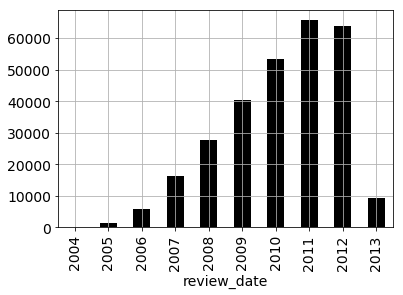

In [10]:
# View count of of reviews by year
reviews.groupby(reviews["review_date"].dt.year) \
                                      .count()['review_id'] \
                                      .plot(kind="bar", color='black')
plt.grid()
plt.show()

Yelp! was founded in Q4 2004. While increasing, the total number of reviews is very low from 2004-2006. 2013 only appears to be lower because the dataset ends on Feb. 21 of that year. I will drop the years 2004-2006 and focus on years with a larger volume of Yelp! data. 

In [11]:
# Filter out data before 2007 and after 2013 
reviews = reviews.loc[(reviews.review_date.dt.year >= 2007)]
inspections = inspections.loc[(inspections['Inspection Date'].dt.year >= 2007) 
                              & (inspections['Inspection Date'].dt.year < 2014)]

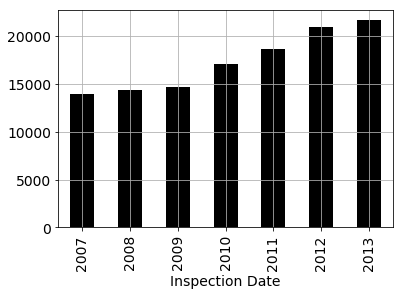

In [12]:
# Review count of inspections per year
inspections.groupby(inspections["Inspection Date"].dt.year) \
                                                  .count()['Name'] \
                                                  .plot(kind="bar", color='black')
plt.grid()
plt.show()

The inspection data includes one row per violation, or a single row per inspection if no violations were found. I will merge all violations corresponding to each single inspection into a single row. First, I need to standardize and encode the violation descriptions. 

In [13]:
inspections.rename(columns={'Violation Description':'violation_descr',},
                   inplace=True)
violation_lists = inspections['violation_descr'].str.split(' - ')

In [14]:
def get_len(x):
    '''Wrapper to handle missing values when checking lengths'''
    try:
        return len(x)
    except:
        return -1

In [15]:
# Not all violations are coded, but all violations have a standard description.
# Create a map and then use to code all violations consistently

# Make series of lists split on hyphen between code and description
violation_lists = inspections['violation_descr'].str.split(' - ')

description_to_code = {}
code_to_description = {}
for i in range(violation_lists.shape[0]):
    
    # Not every row has a violation description 
    try:
        violation_num, description = violation_lists.iloc[i]
        
        # Confirms valid violation code format parsed
        if len(violation_num) == 4:
            # Add code-description pair to two-way maps
            if description not in description_to_code:
                description_to_code[description] = int(violation_num)
                code_to_description[violation_num] = description
    except:
        continue
        
# Try to encode, else return -1
def violation_encoder(x):
    # Handle rows without violation
    try:
        # Handle description-only cases
        if len(x) == 1:
            return description_to_code[x[0]]

        # Handle code-description cases
        elif len(x) == 2:
            return description_to_code[x[1]]
    except TypeError:
        return -1
        
inspections['violation_descr'] = violation_lists.apply(violation_encoder)
inspections['violation_descr'].fillna(-1, inplace=True)

In [16]:
# Pickle the code to description map for later use
with open('data/violation_codes.pickle', 'wb') as handle:
    pickle.dump(code_to_description, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
# Aggregate violation types per restaurant-inspection combination
data_agg = inspections.groupby(['Business_ID', 'Inspection_Serial_Num'], as_index=False) \
                      .agg(dict(violation_descr = lambda x: tuple(x.unique())))

In [18]:
# Update column name to reflect encoding
data_agg.rename(columns={'violation_descr':'violation_code'}, inplace=True)

In [19]:
# Merge new violation code lists back into pre-aggregation inspection data
inspections = inspections.merge(data_agg, how='left', on=['Business_ID', 'Inspection_Serial_Num'])

In [20]:
# Removing columns that do not need to be aggregated per inspection
drop_inspection_cols = ['Violation Type', 'Violation Points', 'Violation_Record_ID',
                        'Program Identifier', 'Inspection Business Name', 'Grade',
                        'Phone', 'violation_descr']
inspections.drop(drop_inspection_cols, axis=1, inplace=True)
inspections.drop_duplicates(inplace=True)

In [21]:
# Evaluate the three types of inspections and outcomes
pd.crosstab(inspections['Inspection Result'], inspections['Inspection Type'],
            margins=True)

Inspection Type,Consultation/Education - Field,Return Inspection,Routine Inspection/Field Review,All
Inspection Result,,,,
Baseline Data,39,8,38,85
Complete,22421,360,316,23097
Confirmed,1,0,2,3
Exchange information,1,0,0,1
In Compliance,1,2,0,3
Incomplete,99,39,230,368
Increased Knowledge,1,0,0,1
Needs Assessment,1,0,0,1
No Longer At Location,0,0,3,3


"Consultation/Education - Field" refers to visits that are scheduled with the business in advance. "Routine Inspection/Field Review" refers to unannounced inspections/audits, while "Return Inspection" refers to a return inspection with cause.  

Almost all "Consulatation/Education - Field" visits are simply noted as "Complete" and very few have any violations or unsatisfactory outcome. I will focus on the routine inspections for my predictive modeling because those are the inspections that require prioritization (the consulation/education visits are not primarily focused on compliance and the return inspections are likely compulsory regardless of a predictive model). 

I will retain the return inspections now; however, for the purpose of defining the correct intrainspection windows. 

In [22]:
# Drop consulation/education samples
inspections = inspections.loc[inspections['Inspection Type'] != 'Consultation/Education - Field']

In [23]:
# Map boolean values for restaurant closure to int for later count aggregation
inspections['Inspection Closed Business'] = inspections['Inspection Closed Business'].map({False:0,True:1})

### Entity Resolution

This analysis requires entity resolution between the Yelp! reviews/restaurants data and the King County food inspection records. Unfortunately, the available Yelp! reviews/restaurants data only provides street address and restaurant name. The King County inspection records provide full address data. Fortunately, this is easier than a general address resolution problem as each independent set is limited to the space of Seattle area restaurant addresses (with the exception of typos/erroneous data).

Approach:
1. Normalize street numbers and street names and left join inspections to restaurant list on these keys
2. Require at least one matching, non-trivial token between names. This is a tradeoff between conservatism in matching and potential loss of valid information (e.g. some restaurants may have a separate name in Yelp! from the business name on record with the County). However, without any name matching, there is a risk of mismatching restaurants that share the same street address (e.g. malls and other multi-use building) or have occupied the same location at different times.

In [24]:
# Street address and name parsing functions
def parse_address(s, target):
    '''Wrapper to parse target token from street address'''
    if pd.notnull(s):
        try: 
            token = usaddress.tag(s)[0][target]
            if isinstance(token, str):
                token = token.lower()
            return token
        except:
            return pd.np.nan
    else:
        return pd.np.nan
    
def parse_name(s):
    '''Parse names into normalized sets of non-trivial tokens'''
    if pd.notnull(s):
        s = s.lower()
        # Citation: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
        exclude = set(string.punctuation)
        s = ''.join(ch for ch in s if ch not in exclude)
        s = set(s.split())
        trivial_tokens = {'llc', 'corp', 'co', 'the', '&', 'and', 'HS', 'of', 'at'}
        return s - trivial_tokens
    else:
        return pd.np.nan

In [25]:
# Create elements for address matching
restaurants['street_num'] = restaurants['street_address'].apply(parse_address,
                                                                target='AddressNumber')
restaurants['street_name'] = restaurants['street_address'].apply(parse_address,
                                                                 target='StreetName')
inspections['street_num'] = inspections['Address'].apply(parse_address,
                                                         target='AddressNumber')
inspections['street_name'] = inspections['Address'].apply(parse_address,
                                                          target='StreetName')

# Create elements for name matching
restaurants['name_tokens'] = restaurants['restaurant_name'].apply(parse_name)
inspections['name_tokens'] = inspections['Name'].apply(parse_name)

In [26]:
# First separate restaurants with and without street_num and street_name
restaurants_street = restaurants.loc[restaurants['street_num'].notnull() \
                                     & restaurants['street_name'].notnull()]
restaurants_no_street = restaurants.loc[restaurants['street_num'].isnull() \
                                        & restaurants['street_name'].isnull()]
print(f'Proportion of restaurants with street address: {restaurants_street.shape[0] / restaurants.shape[0]}')

Proportion of restaurants with street address: 0.9454360020397756


Unfortunately, I have to drop the ~5% of restaurants that do not have a street number and street name. 

In [27]:
# Merge inspections onto restaurant list using street number and street name
restaurants = restaurants_street.merge(inspections, how='left',
                                       on=['street_num', 'street_name'],
                                       suffixes=('_r', '_i'))

In [28]:
# Compute boolean mask for rows where names have at least a partial match
name_match_idx = []
for r_name, i_name in zip(restaurants['name_tokens_r'],
                          restaurants['name_tokens_i']):
    try:
        if len(r_name.intersection(i_name)) > 0:
            name_match_idx.append(True)
        else:
            count_compared += 1
            name_match_idx.append(False)
    except:
        # Handles cases where there is no name match
        name_match_idx.append(False)

In [29]:
# Evaluate how many restaurants joined to any inspection records, as well as how many had at least
# a partial name match as defined above

total_rest_count = restaurants.restaurant_id.nunique()
joined_rest_count = restaurants.loc[restaurants['Inspection Result'] \
                               .notnull()] \
                               .restaurant_id \
                               .nunique()
name_match_count = restaurants.loc[pd.Series(name_match_idx)].restaurant_id.nunique()

print(f'Proportion of restaurants joined to any inspection records: {joined_rest_count / total_rest_count}')
print(f'Proportion of restaurants with inspection and name match: {name_match_count / total_rest_count}')

Proportion of restaurants joined to any inspection records: 0.4843581445523193
Proportion of restaurants with inspection and name match: 0.31283710895361383


About half of the restaurants are matched to inspection results using street number and name. Only about a third of the restaurants match on both inspection result addresses and business names. I'll take a look at some of the restaurants that could not match on street number and name.

In [30]:
# Look at some of the addresses that are failing to match
view_cols = ['restaurant_name','street_address','street_num','street_name']
restaurants.loc[restaurants['Inspection Result'].isnull(),view_cols].head(10)

,restaurant_name,street_address,street_num,street_name
0,Ximaica,2224 2nd Avenue,2224,2nd
1,XO Bistro,2359 10th Ave E,2359,10th
17,Yoshino Teriyaki,812 12th Ave,812,12th
18,Yoshio's Teriyaki,3860 Delridge Way SW,3860,delridge
61,Yummy Bowl,215 Pine St,215,pine
62,Yummy Bites,4131 University Way NE,4131,university
117,Oya Teriyaki,7114 E Marginal Way S,7114,marginal
118,Oya Teriyaki,7114 E Marginal Way S,7114,marginal
176,The Old Spaghetti Factory,2801 Elliott Ave,2801,elliott
184,The Original Deli,1215 4th Ave,1215,4th


The street numbers and names seem fine, so I manually checked the inspection records to look for a possible error in my entity resolution approach. I did not find any similar addresses. It is possible that not every restaurant had unannounced inspections, that there are errors in addresses (e.g. typos or Yelp! address does not match official inspection address). In either case, a more robust entity resolution might be interesting in a future extension.  

The name matching ended up being very significant, as without name matching, the same inspections get mapped to multiple restaurants. I have not kept all my exploratory work in this notebook, but it can be shown that the partial non-trivial name match largely mitigates the duplicate inspection issue. 

In [31]:
# Select the rows with partial name match
restaurants = restaurants.loc[name_match_idx]
restaurants = restaurants.loc[restaurants['Inspection Result'].notnull()]

### Aggregating Inspection Windows and Time Series Feature Engineering

In [32]:
# Drop features that are no longer required. Will keep some address data for geocoding.
# I am also throwing out the Yelp! rating and review count as they are
# at a snapshot in time, I will use actual cumulative numbers from the reviews themselves
# to reflect what data is available at the time of each inspection. 
post_merge_drop = ['rating', 'review_count', 'locality', 'restaurant_name',
                   'street_address', 'street_num', 'street_name', 'name_tokens_r',
                   'Name', 'Business_ID', 'name_tokens_i']
restaurants.drop(post_merge_drop, axis=1, inplace=True)

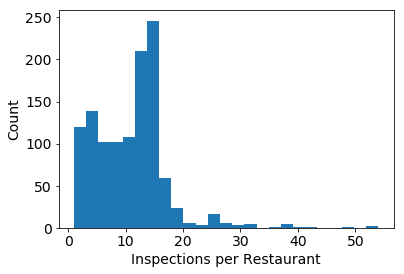

Mean inspections per restaurant: 10.886206896551725, Median inspections per restaurant: 12.0


In [33]:
# Explore distribution of inspections per restaurant (note: not normalized for duration retaurant has been open, or on Yelp)
dist = restaurants.groupby(restaurants["restaurant_id"]).count()['Inspection_Serial_Num']
plt.hist(dist, bins=25)
plt.xlabel('Inspections per Restaurant')
plt.ylabel('Count')
plt.show()
print(f'Mean inspections per restaurant: {dist.mean()}, Median inspections per restaurant: {dist.median()}')

Next I create some basic time series features. These could be adjusted later based on model crossvalidation. For now, I do not implement any sophisticated smoothing/exponential decay type features.

In [34]:
# Sort inspections by date within each restaurant's group
restaurants = (restaurants.groupby('restaurant_id', as_index=False)
                          .apply(lambda df : df.sort_values(by='Inspection Date')) 
                          .reset_index(drop=True))

# Add features for date of last inspection, score of last inspection, result of last inspection,
# interval since last inspection, violations at last inspection
restaurants['last_date'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Date']
                                       .transform(lambda x : x.shift(1)))
restaurants['last_score'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Score'] 
                                        .transform(lambda x : x.shift(1)))
restaurants['last_result'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Result']
                                         .transform(lambda x : x.shift(1)))
restaurants['inspection_interval'] = restaurants['Inspection Date'] - restaurants['last_date']
restaurants['violation_code'] = (restaurants.groupby('restaurant_id', as_index=False)['violation_code'] 
                                            .transform(lambda x : x.shift(1)))

# Compute cumulative score, cumulative inspection count, cumulative closures, and mean (previous) inspection score
restaurants['cum_score'] = restaurants.groupby('restaurant_id', as_index=False)['Inspection Score'].cumsum()
restaurants['cum_score'] = (restaurants.groupby('restaurant_id', as_index=False)['cum_score'] 
                                       .transform(lambda x : x.shift(1)))
restaurants['cum_inspections'] = 1
restaurants['cum_inspections'] = restaurants.groupby('restaurant_id', as_index=False)['cum_inspections'].cumsum()
restaurants['cum_inspections'] = (restaurants.groupby('restaurant_id', as_index=False)['cum_inspections'] 
                                             .transform(lambda x : x.shift(1)))
restaurants['Inspection Closed Business'] = restaurants.groupby('restaurant_id', as_index=False)['Inspection Closed Business'].cumsum()
restaurants['Inspection Closed Business'] = (restaurants.groupby('restaurant_id', as_index=False)['Inspection Closed Business']
                                                        .transform(lambda x : x.shift(1)))
restaurants['mean_score'] = restaurants['cum_score'] / restaurants['cum_inspections']

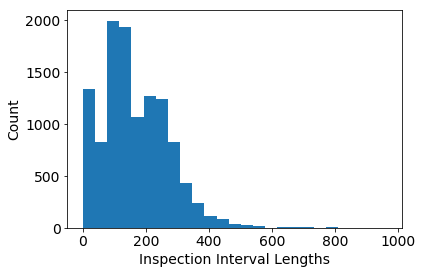

Mean inspection interval: 164.4000697593303, Median inspection interval: 146.0


In [35]:
# Check distribution of all inspection intervals.
dist = restaurants['inspection_interval'].dt.days.dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Interval Lengths')
plt.ylabel('Count')
plt.show()
print(f'Mean inspection interval: {dist.mean()}, Median inspection interval: {dist.median()}')

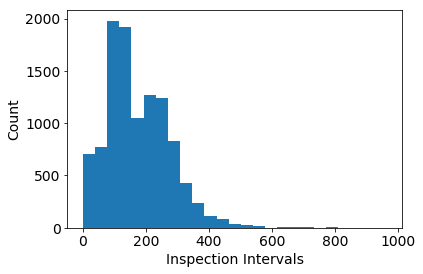

Mean inspection interval: 173.7911032360347, Median inspection interval: 154.0


In [36]:
# Check distribution of only routine (not return) inspections. It looks similar except for the loss of
# very short inspection windows. This makes sense, given that follow-up inspections would be scheduled
# on a shorter time frame than a routine visit.
dist = restaurants.loc[restaurants['Inspection Type'] == 'Routine Inspection/Field Review']['inspection_interval'].dt.days.dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Intervals')
plt.ylabel('Count')
plt.show()
print(f'Mean inspection interval: {dist.mean()}, Median inspection interval: {dist.median()}')

Now, I will map the review data to the restaurants.

In [37]:
# Merge reviews onto restaurants
data = restaurants.merge(reviews, how='left', on='restaurant_id')

In [38]:
# Need to filter down to only reviews matching each restaurant and inspection window
data = data.loc[(data['review_date'] >= data['last_date']) &
                                           (data['review_date'] < data['Inspection Date'])]

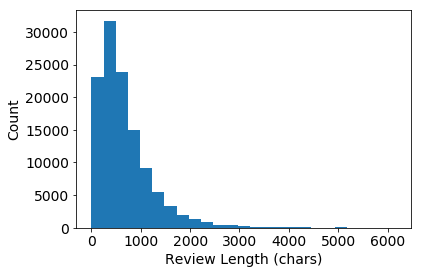

Mean review length: 672.1603011868805, Median review length: 530.0


In [39]:
# Check distribution of review lengths in characters
dist = data['content'].apply(len)
plt.hist(dist, bins=25)
plt.xlabel('Review Length (chars)')
plt.ylabel('Count')
plt.show()
print(f'Mean review length: {dist.mean()}, Median review length: {dist.median()}')

I will drop the first inspection for each restaurant due to missing features (e.g. previous scores). It may be of some use to train a model for making predictions for restaurants with no prior inspections; however, it also seems likely that inspecting a restaurant with no inspection history would be a priority regardless. 

For this prototype, I will drop the first inspection for each restaurant due to missing features (e.g. previous inspection score, cumulative inspection score, etc.). However, training models that handle these missing values might be important for a production application that could be used on restaurants without an inspection history (at the same time, it seems reasonable that restaurants without any history need to be prioritized regardless of any predictive model). 

In [40]:
# First inspection for each restaurant includes nan's for time series forward shifts
data.dropna(inplace=True)

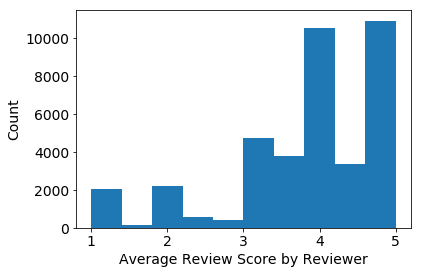

Mean of mean review score per reviewer: 3.842382135371164, Median of mean review score per reviewer: 4.0


In [41]:
# Check distribution of average review score by reviewer 
dist = data.groupby(data["user_id"])['rating'].mean()
plt.hist(dist, bins=10)
plt.xlabel('Average Review Score by Reviewer')
plt.ylabel('Count')
plt.show()
print(f'Mean of mean review score per reviewer: {dist.mean()}, Median of mean review score per reviewer: {dist.median()}')

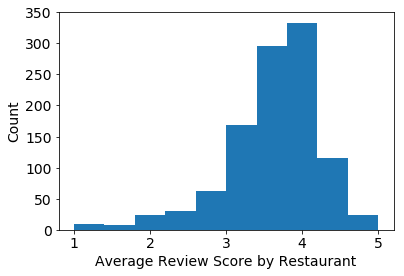

Mean of mean review score per restaurant: 3.620384663112365, Median of mean review score per restaurant: 3.72


In [42]:
# Check distribution of average review score by restaurant
dist = data.groupby(data["restaurant_id"])['rating'].mean()
plt.hist(dist, bins=10)
plt.xlabel('Average Review Score by Restaurant')
plt.ylabel('Count')
plt.show()
print(f'Mean of mean review score per restaurant: {dist.mean()}, Median of mean review score per restaurant: {dist.median()}')

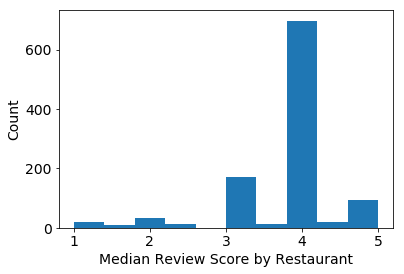

Mean of median review score per restaurant: 3.774812734082397, Median of median review score per restaurant: 4.0


In [43]:
# Check distribution of median review score by restaurant
dist = data.groupby(data["restaurant_id"])['rating'].median()
plt.hist(dist, bins=10)
plt.xlabel('Median Review Score by Restaurant')
plt.ylabel('Count')
plt.show()
print(f'Mean of median review score per restaurant: {dist.mean()}, Median of median review score per restaurant: {dist.median()}')

Most reviewers give mostly high ratings, while some reviewers consistently give very low ratings. This could be a real effect, or fake reviewers might be trying to help or hurt particular restaurants. Detecting fake reviews could be a project in its own right. 

For now, I will simply standardize reviews per reviewer. Unfortunately, this will cause a loss of information related to inter-reviewer variance, but should help with reviewers who tend to rate across different ranges from eachother as well as mitigating the effect of reviewers who always rate high or low. 

This normalization is a little tricky, as I technically should only normalize over ratings in the training set. However, that would require identifying splits before aggregating reviews by inspection. For now, I will simply normalize over all reviews per reviewer and can revisit this shortcut if normalized review score ends up being a significant predictor in the later models. 

In [44]:
# Normalize review ratings for each reviewer
user_means = data.groupby('user_id')['rating'].mean().to_dict()
user_stdevs = data.groupby('user_id')['rating'].std().fillna(0).to_dict()

# Deal with cases with no variance or only one review (stdev doesn't matter, as they will map to 0 anyways)
for u in user_stdevs.keys():
    if user_stdevs[u] == 0 or np.isnan(user_stdevs[u]):
        user_stdevs[u] = 1
        
data['user_mean'] = data['user_id'].apply(lambda x : user_means[x])
data['user_stdev'] = data['user_id'].apply(lambda x : user_stdevs[x])
data['norm_rating'] = (data['rating'] - data['user_mean']) / data['user_stdev']

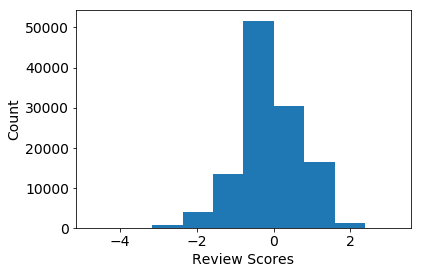

Mean of normalized review scores: 2.875590850482155e-17, Median of normalized review scores: 0.0


In [45]:
# Check distribution of normalized review scores 
dist = data['norm_rating'].dropna()
plt.hist(dist)
plt.xlabel('Review Scores')
plt.ylabel('Count')
plt.show()
print(f'Mean of normalized review scores: {dist.mean()}, Median of normalized review scores: {dist.median()}')

As expected, the distribution is now roughly normal. 

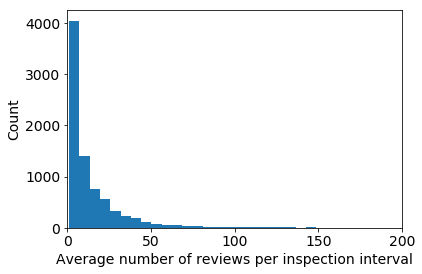

Mean number of reviews per inspection interval: 14.602610316967061
Median number of reviews per inspection interval: 7.0


In [46]:
# Check distribution of number of reviews per inspection interval 
dist = data.groupby(['Inspection Date','restaurant_id'])['norm_rating'].count()
plt.hist(dist, bins=100)
plt.xlim(0,200)
plt.xlabel('Average number of reviews per inspection interval')
plt.ylabel('Count')
plt.show()
print(f'Mean number of reviews per inspection interval: {dist.mean()}')
print(f'Median number of reviews per inspection interval: {dist.median()}')

I will aggregate the review text 3 ways: all reviews, positive/negative Yelp! rating reviews, and pass/fail inspection reviews. This will provide options for later text analysis. 

In [47]:
# Now need to aggregate reviews per each restaurant/inspection combination
data_agg = data.groupby(['restaurant_id','Inspection Date'], as_index=False).agg(dict(norm_rating = 'mean', 
                                                                                  rating = 'mean',
                                                                                  review_date = 'count',
                                                                                  content = lambda x: '%s'%'\n'.join(x)))
data_agg.rename(columns={'content':'all_reviews'}, inplace=True)

In [48]:
# Now aggregating only non-positive reviews
data_agg_neg = (data.loc[data['rating'] <=3,:]
                    .groupby(['restaurant_id','Inspection Date'], as_index=False)
                    .agg(dict(content = lambda x: '%s'%'\n'.join(x))))
data_agg_neg.rename(columns={'content':'neg_reviews'}, inplace=True)

In [49]:
# Now aggregating only positive reviews
data_agg_pos = (data.loc[data['rating'] >3,:]
                    .groupby(['restaurant_id','Inspection Date'], as_index=False)
                    .agg(dict(content = lambda x: '%s'%'\n'.join(x))))
data_agg_pos.rename(columns={'content':'pos_reviews'}, inplace=True)

In [50]:
# Now aggregating reviews where inspection failed
data_agg_unsat = (data.loc[data['Inspection Result'] == 'Unsatisfactory',:]
                      .groupby(['restaurant_id','Inspection Date'], as_index=False)
                      .agg(dict(content = lambda x: '%s'%'\n'.join(x))))
data_agg_unsat.rename(columns={'content':'unsat_reviews'}, inplace=True)

In [51]:
# Now aggregating reviews where inspection passed
data_agg_sat = (data.loc[data['Inspection Result'] == 'Satisfactory',:]
                    .groupby(['restaurant_id','Inspection Date'], as_index=False)
                    .agg(dict(content = lambda x: '%s'%'\n'.join(x))))
data_agg_sat.rename(columns={'content':'sat_reviews'}, inplace=True)

In [52]:
# Merge aggregated features back into main dataset
drop_columns = ['review_id', 'user_id', 'locality', 'review_date', 'rating',
                'content', 'user_mean', 'user_stdev', 'norm_rating',
                'Inspection_Serial_Num']
data = (data_agg.merge(data.drop(drop_columns, axis=1),
                       on=['restaurant_id', 'Inspection Date'], how='left')
                .drop_duplicates())
data = data.merge(data_agg_neg, on=['restaurant_id', 'Inspection Date'], how='left')
data = data.merge(data_agg_pos, on=['restaurant_id', 'Inspection Date'], how='left')
data = data.merge(data_agg_unsat, on=['restaurant_id', 'Inspection Date'], how='left')
data = data.merge(data_agg_sat, on=['restaurant_id', 'Inspection Date'], how='left')

Rename columns with nicer formatting. 

In [53]:
assert data.shape[0] == data_agg.shape[0]
data.rename(columns={'Inspection Date':'date', 'norm_rating':'avg_norm_rating',
                     'review_date':'num_reviews_intv', 'content':'reviews',
                     'rating':'avg_rating', 'review_count':'num_reviews_cum',
                     'Description':'rest_type', 'Address':'address',
                     'City':'city', 'Zip Code':'zip', 'Longitude':'long',
                     'Latitude':'lat', 'Inspection Type':'inspect_type',
                     'Inspection Score':'inspect_score', 'Inspection Result':'inspect_result',
                     'cum_inspections':'cum_num_inspect', 'inspection_interval':'inspect_intv',
                     'Inspection Closed Business':'cum_closures'}, inplace=True)

I can now drop the return inspections as well, so that the entire dataset is for routine inspections.

In [54]:
data = data.loc[data['inspect_type'] != 'Return Inspection',:]

Finally, I will review the distribution of inspection scores overall.

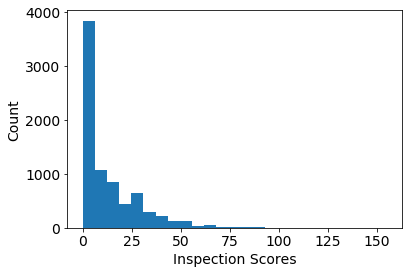

Mean of inspection scores: 12.531862745098039, Median of inspection scores: 7.0


In [55]:
# Check distribution of normalized inspection scores 
dist = data['inspect_score'].dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Scores')
plt.ylabel('Count')
plt.show()
print(f'Mean of inspection scores: {dist.mean()}, Median of inspection scores: {dist.median()}')

### Categorical (Except Review Text) Feature Engineering

In [56]:
# Reset to fresh index
data.reset_index(drop=True, inplace=True)

In [57]:
# Get additional date features, convert time since last inspection to int
dt_attributes = ['quarter', 'year', 'month', 'dayofweek']
for attr in dt_attributes:
    data[attr] = data['date'].apply(lambda x : getattr(x, attr))
data['inspect_intv'] = data['inspect_intv'].apply(lambda x : getattr(x, 'days'))

In [58]:
# Convert cuisine categories from strings to lists for later analysis
def proc_cusine_categories(s):
    new_s = s.split('\', u\'')
    new_s[0] = new_s[0].lstrip('[u\'')
    new_s[-1] = new_s[-1].rstrip('\']')
    return tuple(new_s)

data['categories'] = data['categories'].apply(proc_cusine_categories)

In [59]:
# Need to standardize city names
data['city'] = data['city'].str.lower()

In [60]:
# Clean up result types and drop ambiguous results
results_map = {'Satisfactory':0, 'Unsatisfactory':1, 'Complete':0,
               'Not Accessible':2, 'Incomplete':2, 'Baseline Data':2,
               'Not Confirmed':2, 'Not Permitted':2}
data['inspect_result'] = data['inspect_result'].map(results_map)
data = data.loc[data['inspect_result'] != 2]

In [61]:
data['last_result'] = data['last_result'].map(results_map)

### Load and Merge Population Data

In [62]:
# First need to export list of unique addresses for geocoding to census tracts
pre_addresses = data.loc[:,['address','city','zip']].drop_duplicates()
pre_addresses['State'] = 'WA'
pre_addresses.to_csv('data/pre_geocode_addresses.csv')

In [63]:
# Used Texas A&M geocoding services and now importing results back in
post_addresses = pd.read_csv('data/post_geocode_addresses.csv')
post_addresses.drop_duplicates(inplace=True)

In [64]:
# Merge back into main dataset
data['address'] = data['address'].str.strip()
data = data.merge(post_addresses, how='left', on=['address','city','zip'])

In [65]:
# Drop columns no longer needed and reformat tract for later join
data.drop(['address','city','zip'], axis=1, inplace=True)
data['tract'] = (data['tract'] * 100).astype(int) 

I will use the 2011 5-year ACS data which roughly covers the timespan of this analysis. Technically, some of the data represents dates after some samples, but this is a reasonable approximation and can be revisited if the community features appear to be very significant. I have left some code in place below where I had previously tried using ACS data from prior years, but the temporal tract numbering changes would require a more complicated temporal geocoding which may be something to explore further if these features end up being important for the final predictor. 

In [66]:
year_map = {2007:2011, 2008:2011, 2009:2011, 2010:2011, 2011:2011,
            2012:2011, 2013:2011}
data['acs_join_year'] = data['year'].apply(lambda x: year_map[x])

In [67]:
# Unfortunately, ACS files have remained column order but have not maintained exact names over time.
# I will have to compile data by index and rename before merging into main file. 

na_values=['*','**','-']

acs_idx_names = {1:'tract', 3:'total_pop', 75:'median_age', 83:'%_male', 107:'%_white',
                 115:'%_black', 131:'%_asian', 147:'%_other_race', 163:'%_hispanic_latino',
                 195:'speak_eng_+_other_lang', 203:'speak_other_lang', 227:'%_married', 
                 259:'%_ed_less_than_hs', 291:'%_ed_grad_prof_deg', 371:'median_income',
                 387:'%_poverty'}

idxs, col_names = list(acs_idx_names.keys()), list(acs_idx_names.values())
acs_data = []

for year in ['2009','2010','2011']:
    temp_acs_data = pd.read_csv(f'data/ACS_{year[2:]}_5YR_S0601_with_ann.csv',
                                na_values=na_values)
    temp_acs_data = temp_acs_data.iloc[:,idxs]
    temp_acs_data.columns=col_names
    temp_acs_data['acs_join_year'] = int(year)
    # Extract tract portion of FIPS code
    temp_acs_data['tract'] = temp_acs_data['tract'].apply(lambda x : int(str(x)[-6:]))
    # Fill missing values with medians
    temp_acs_data.fillna(temp_acs_data.median())
    acs_data.append(temp_acs_data)
    
# Finally, concatenate into single dataframe
acs_data = pd.concat(acs_data, axis=0)

In [68]:
# Merge population data into main dataset
data = data.merge(acs_data, how='left', on=['tract','acs_join_year'])
data.drop('acs_join_year', axis=1, inplace=True)

Finally, I will review the distribution of inspection scores overall, as well as condition on the categorical inspection result. 

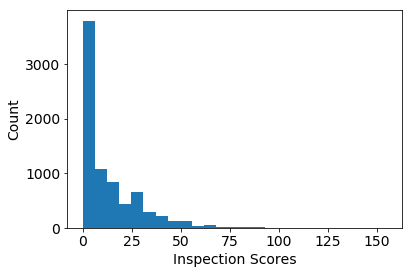

Mean of inspection scores: 12.601922827075484, Median of inspection scores: 7.0


In [69]:
# Check distribution of normalized review scores 
dist = data['inspect_score'].dropna()
plt.hist(dist, bins=25)
plt.xlabel('Inspection Scores')
plt.ylabel('Count')
plt.show()
print(f'Mean of inspection scores: {dist.mean()}, Median of inspection scores: {dist.median()}')

In [70]:
# Save dataframe for quick restart after this point
data.to_csv('data/data.csv', index=False)

### Split Training, Validation, and Test Data

The temporal aspect of this problem makes splitting validation and test sets more challenging. For example, a standard k-folds cross-validation approach and randomly drawn test set would not be appropriate. Under that approach, the model could train on inspection results that occurred after some of the prediction events. 

Ideally, I would have plenty of data to split training, validation, and test sets by date (i.e. all validation data occurs after training data, all test data occurs after validation data). However, I only have ~8000 inspection windows to work with.

I will split out the most recent 20% for test to ensure the final check on results is not using future data for training. However, I will use 10-fold cross-validation on the 80% training data, accepting the potential for some bias in the results in exchange for the opportunity to train and validate on more data. If I did use a hard three-way partition, the validation set would be better representing the time component of the problem, but the relatively small training set and single validation set would cause the cross-validation metrics to have higher variance which is problematic in a different way. 

In [71]:
# Read dataframe from disk
import ast
data = pd.read_csv('data/data.csv',
                   converters={"violation_code": ast.literal_eval, "categories": ast.literal_eval})

In [72]:
train = data.sort_values('date').iloc[:int(0.8 * data.shape[0]),:]
test = data.sort_values('date').iloc[int(0.8 * data.shape[0]):,:]
print(f'{train.shape[0]} samples in training set. Date range: {train.date.min()} to {train.date.max()}')
print(f'{test.shape[0]} samples in test set. Date range: {test.date.min()} to {test.date.max()}')

6157 samples in training set. Date range: 2007-02-28 to 2012-08-14
1540 samples in test set. Date range: 2012-08-14 to 2013-12-27


Next, I will explore the three sets of predictors: (1) prior inspection data, (2) place data, and (3) Yelp! data. After exploring the three sets, I will construct a final model using the relevant features from each set. 

### Explore Inspection Record Features

I will start by exploring the inspection record features alone. To start, I will see if I can better structure the violation type codes. Each inspection can have 0 or more violations mapped to it. It is possible that the particular types of violations in prior inspections are important for predicting future outcomes.

In [73]:
# Read violation code mapping from picke file, note you can also get this from running earlier sections
with open('data/violation_codes.pickle', 'rb') as handle:
    code_to_description = pickle.load(handle)
    code_to_description['-001'] = 'No violation or code is unknown'

In [74]:
inspect_cols = ['rest_type', 'inspect_type', 'inspect_score', 'inspect_result',
                'cum_closures', 'violation_code', 'last_score', 'last_result', 'inspect_intv',
                'cum_score', 'cum_num_inspect', 'mean_score', 'quarter', 'year', 'month',
                'dayofweek']
train_inspect = train.loc[:,inspect_cols].copy()

In [75]:
# Count number of unique violation types
train_inspect.reset_index(inplace=True, drop=True)
unique_violations = set()
for i in range(train_inspect.shape[0]):
    unique_violations = unique_violations.union(set(train_inspect.loc[i,'violation_code']))
print(f'Number of unique violation codes: {len(unique_violations)}')

Number of unique violation codes: 52


In [76]:
# Note that -1 means that there was either no violation code or the description could not be mapped
count_categories = {}
for i in range(data.shape[0]):
    for cat in data.loc[i, 'violation_code']:
        try:
            count_categories[cat] += 1
        except KeyError:
            count_categories[cat] = 1

# View top 10 categories
for cat, count in sorted(count_categories.items(), key= lambda x : x[1], reverse=True)[:20]:
    print(f'{code_to_description[str(cat).zfill(4)]}, Count: {count}, {100*count/data.shape[0]}%')

No violation or code is unknown, Count: 2864, 37.2093023255814%
Pool surface color is not white or light color, Count: 1053, 13.680654800571652%
Proper cold holding temperatures (greater than  45 degrees F), Count: 924, 12.004677146940367%
Adequate handwashing facilities, Count: 838, 10.887358711186176%
Potential food contamination prevented during delivery,  preparation, storage, display, Count: 742, 9.640119527088476%
Food Worker Cards current for all food workers; new food workers trained, Count: 735, 9.549175003248019%
Warewashing facilities properly installed,..., Count: 675, 8.769650513186956%
Food-contact surfaces maintained, clean, sanitized, Count: 528, 6.859815512537352%
Non-food contact surfaces maintained and clean, Count: 523, 6.794855138365597%
Physical facilities properly installed,..., Count: 473, 6.145251396648045%
In-use utensils properly stored, Count: 422, 5.482655580096141%
Proper cold holding temperatures (42 degrees F to 45 degrees F), Count: 395, 5.1318695595686

The violation code frequency drops off quickly. I will explore whether the violation codes are correlated. To do this, I will build a one-hot-encoded matrix of the more common violation types.

In [77]:
# Explore distribution of labels through OHE

# First remove -1, as it indicated no or unknown code and any codes occuring fewer than 50 times
unique_violations.remove(-1)
for cat, count in sorted(count_categories.items(), key= lambda x : x[1], reverse=False):
    if count <= 50:
        unique_violations.remove(cat)
    elif count > 50:
        break

def check_membership(x, element):
    '''Helper for checking membership of element in a list'''
    return element in x

column_labels = []
violation_ohe = np.zeros((train_inspect.shape[0], len(unique_violations)))

for i, cat in enumerate(unique_violations):
    column_labels.append(str(cat))
    violation_ohe[:,i] = train_inspect['violation_code'].apply(check_membership, element=cat).values

First, I will try PCA on the matrix, although PCA is often not ideal for OHE data.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
violation_ss = StandardScaler()
violation_ohe_std = violation_ss.fit_transform(violation_ohe)

violation_pca = PCA(n_components=30)
pca_violation_ohe = violation_pca.fit_transform(violation_ohe_std)

# Make a null set for comparison
uncorr_ohe = np.array(violation_ohe_std)
for i in range(uncorr_ohe.shape[1]):
    np.random.shuffle(uncorr_ohe[:,i])
null_pca = PCA(n_components=30)
null_pca.fit(uncorr_ohe)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

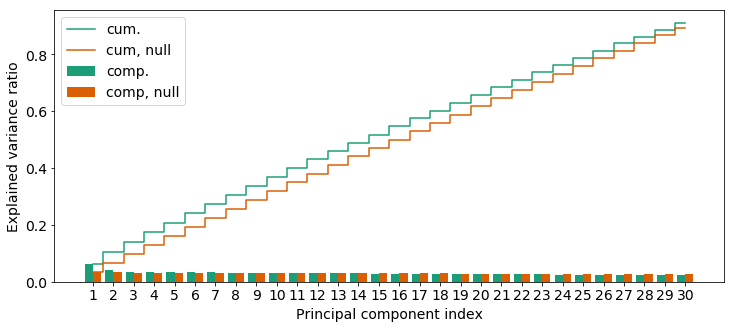

In [79]:
# Plot variance explained vs null ohe set
variance_explained_plot(violation_pca, null_pca, figsize=(12,5))

Only the first principal component does better than a projection with uncorrelated data, so this is not very interesting.

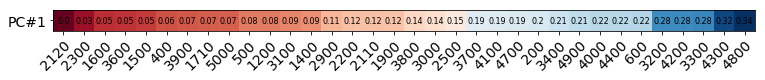

In [80]:
# Plot heatmap of the composition of the first principal component
heat_map(violation_pca.components_[:1], column_labels,
         ['PC#' + str(i) for i in range(1,len(violation_pca.components_[:1])+1)], figsize=(12,5))

In [81]:
# Print top 5 violations on high-end
high = ['4800','4300','4200','3300','4000']
for c in high:
    print(code_to_description[c])

Physical facilities properly installed,...
Non-food contact surfaces maintained and clean
Food-contact surfaces maintained, clean, sanitized
Potential food contamination prevented during delivery,  preparation, storage, display
Food and non-food surfaces properly used and...


These appear to be mainly sanitation related. PCA is at least finding something, as the top components of the first principal component are not neccessarily the most frequently occuring labels. 

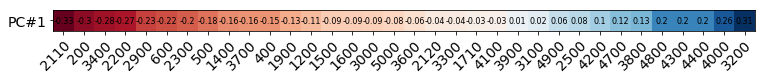

In [82]:
# Plot heatmap of the composition of the second principal component
heat_map(violation_pca.components_[1:2], column_labels,
         ['PC#' + str(i) for i in range(1,len(violation_pca.components_[1:2])+1)],
                                        figsize=(12,5))

In [83]:
# Print violations on high-end
high = ['4300','4000','4400','3200','3800']
for c in high:
    print(code_to_description[c])

Non-food contact surfaces maintained and clean
Food and non-food surfaces properly used and...
Plumbing properly sized, installed,...
Insects, rodents, animals not present; entrance controlled.
Utensils, equipment, linens properly stored,...


There is some overlap, but possibly this is finding more related to facility maintenance instead of just sanitation. 

Next, I will try clustering the violation types using k-means approach.

In [84]:
from sklearn.cluster import KMeans
from GapAnalysis import *

max_clusters=20

# Evaluate varying numbers of clusters using within-cluster SSE
km_inertias = []
km_labels = []
km_centers = []
range_n_clusters = [n for n in range(1,max_clusters+1)]
for n in range_n_clusters:
    km = KMeans(n_clusters=n)
    labels = km.fit_predict(violation_ohe)
    km_labels.append(labels)
    km_inertias.append(km.inertia_)
    km_centers.append(km.cluster_centers_)

In [85]:
# Run gap analysis for comparison of clusters to null samples
ga = GapAnalysis(KMeans, random_state=0, max_clusters=max_clusters, num_samples=5)
ga.fit(violation_ohe)

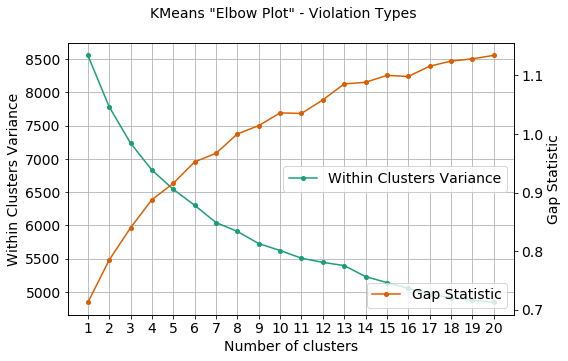

In [86]:
km_elbow_diagram(range_n_clusters, [km_inertias, ga.gap_], 
                 metrics=['Within Clusters Variance', 'Gap Statistic'],
                 title='KMeans "Elbow Plot" - Violation Types',
                 leg_loc1='center right', leg_loc2='lower right', figsize=(8,5))

As is typical, k-means has somewhat subjective results. It looks like around 7 clusters is a good place to investigate.

In [87]:
# Let's look at the three largest contributors to each cluster.
# A more sophisticated approach would be to report the main contributors up until a steep drop (maybe look at that later).
km_centers_df = pd.DataFrame(km_centers[6], columns=column_labels)
for i in range(km_centers_df.shape[0]):
    print(f'Cluster {i+1}:')
    temp = km_centers_df.iloc[i,:].sort_values(ascending=False)
    top_violations = temp.index.tolist()[:5]
    for violation in top_violations:
        code = violation
        if len(code) == 3:
            code = '0' + code
        print(code_to_description[code])
    print('')

Cluster 1:
Adequate handwashing facilities
Proper cold holding temperatures (42 degrees F to 45 degrees F)
Warewashing facilities properly installed,...
In-use utensils properly stored
Non-food contact surfaces maintained and clean

Cluster 2:
Warewashing facilities properly installed,...
Proper cold holding temperatures (42 degrees F to 45 degrees F)
Food-contact surfaces maintained, clean, sanitized
Non-food contact surfaces maintained and clean
Raw meats below and away from ready to eat food; species separated

Cluster 3:
Pool surface color is not white or light color
Food Worker Cards current for all food workers; new food workers trained
Adequate handwashing facilities
Warewashing facilities properly installed,...
Non-food contact surfaces maintained and clean

Cluster 4:
Potential food contamination prevented during delivery,  preparation, storage, display
Pool surface color is not white or light color
Adequate handwashing facilities
Non-food contact surfaces maintained and clean

I am not seeing anything particularly striking about these clusters, particularly because they have lots of overlap. For now, I will simply proceed with all violation code types that occurred at least 10 times.

Finally, I'll see if agglomerative clustering reveals anything interesting.

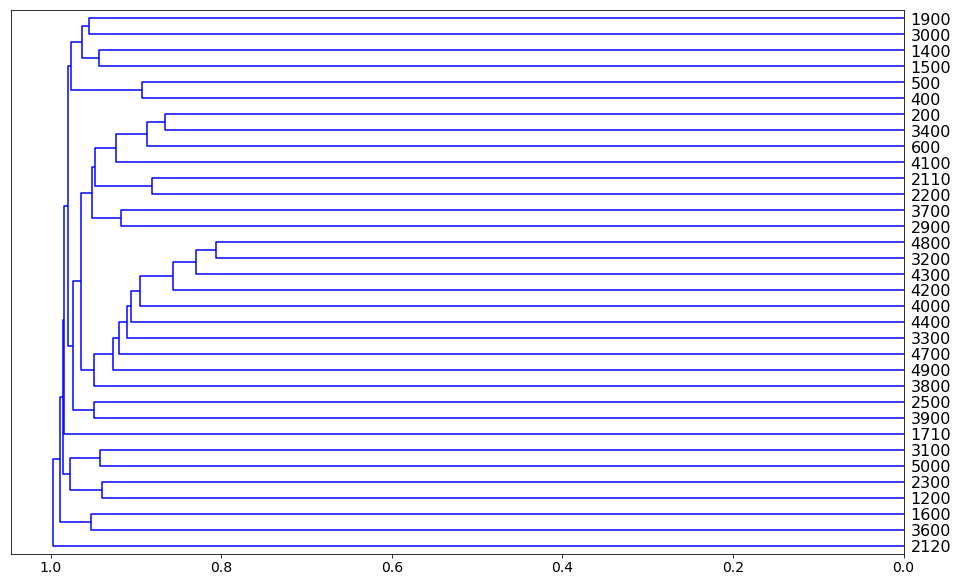

In [88]:
from scipy.cluster import hierarchy as hc

# This method and code copied from a fast.ai lecture notebook
corr = np.round(scipy.stats.spearmanr(violation_ohe).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=column_labels, orientation='left',
                           leaf_font_size=16)
plt.show()

None of the codes are very close by this measure. The closest are 3200, 4200, 4300, and 4800, the same grouping found by the first principal component. This is not surprising, given that both heirarchical clustering on Spearman's rank correlation and PCA are essentially looking at different measures of correlation between features.  

As I did not uncover any interesting structure ammongst violation codes, I will simply proceed with the OHE features for the most common violation types and try them in a later predictive model. 

In [89]:
# Make a dataframe from violation OHE
violation_df = pd.DataFrame(violation_ohe, columns=column_labels)

In [90]:
# Next, I need to merge the violation data back into the main dataset in ohe format
train_inspect = pd.concat([train_inspect, violation_df], axis=1)

In [91]:
# Drop original violation code tuples
train_inspect.drop('violation_code', axis=1, inplace=True)

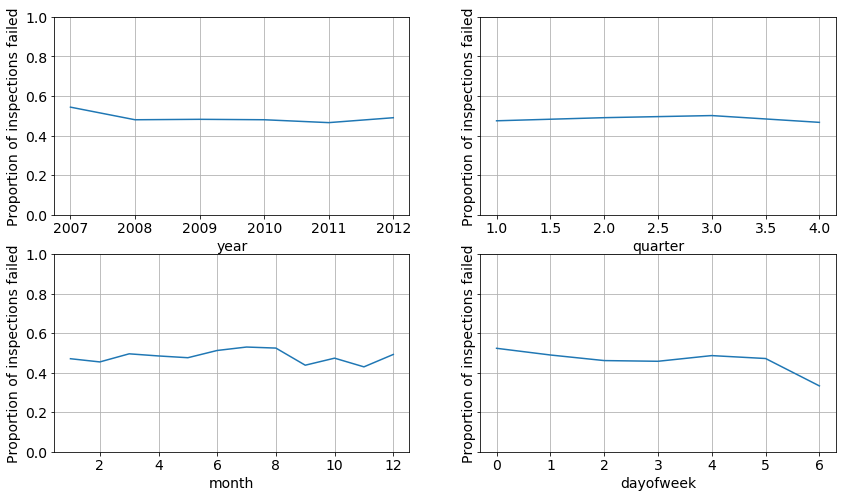

In [92]:
# Explore proportion of failed inspections vs. varying time periods
fig, axes = plt.subplots(2,2, sharey=True, figsize=(14,8))

for idx, period in enumerate(['year','quarter','month','dayofweek']):
    ct = pd.crosstab(train_inspect[period],train_inspect['inspect_result'])
    x = ct.index.values
    y = ct.values[:,1] / ct.values.sum(axis=1)

    ax = axes[idx // 2,idx % 2]
    ax.plot(x, y)
    ax.set_xlabel(period)
    ax.set_ylabel('Proportion of inspections failed')
    ax.set_ylim(0,1)
    ax.grid()
    
plt.show()

For the most part these patterns seem random, with the exception of Saturday's showing a lower failure rate. These are primarily of interest as control variables, as obviously the inspectors shouldn't believe that restauants would have improved food safety if all inspections are completed on Saturday's. 

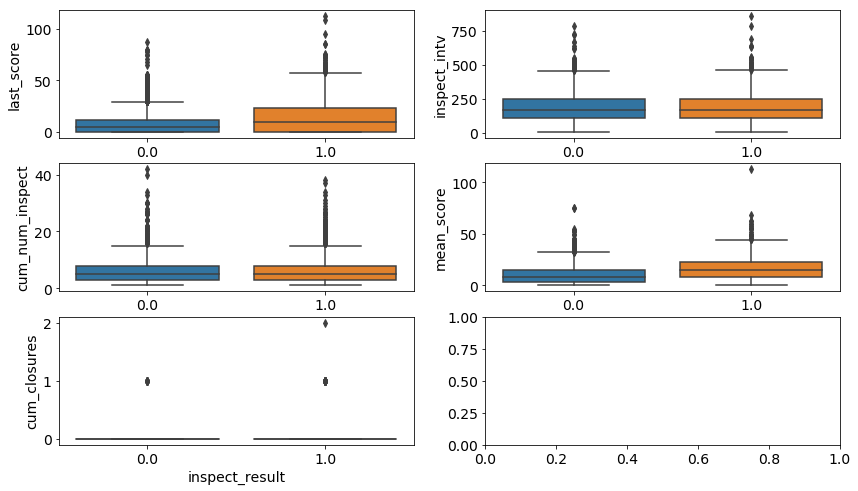

In [93]:
# Explore proportion of failed inspections vs. other time series features
fig, axes = plt.subplots(3,2,figsize=(14,8))
for idx, var in enumerate(['last_score','inspect_intv','cum_num_inspect','mean_score',
                           'cum_closures']):
    sns.boxplot(x='inspect_result', y=var, data=train_inspect, ax=axes[idx // 2,idx % 2])

It looks like previous scores have the strongest association, while time since last inspection and total number of prior inspections are less significant. Finally, I will look at inspection result vs. categorical variables.

In [94]:
# Check prior inspection vs. current inspection
print(pd.crosstab(train_inspect['last_result'], train_inspect['inspect_result']))
print('')
print(pd.crosstab(train_inspect['inspect_type'],train_inspect['inspect_result']))
print('')
print(pd.crosstab(train_inspect['rest_type'],train_inspect['inspect_result']))

inspect_result   0.0   1.0
last_result               
0               2053  1283
1               1110  1653
2                 27    31

inspect_result                    0.0   1.0
inspect_type                               
Routine Inspection/Field Review  3190  2967

inspect_result                               0.0   1.0
rest_type                                             
Bakery-no seating - Risk Category III          6     0
Caterer - Risk Category III                    3     2
Grocery Store-no seating - Risk Category I     1     6
Meat/Sea Food - Risk Category III              3    15
Mobile Food Unit - Risk Category I             1     1
Mobile Food Unit - Risk Category II            2     1
Mobile Food Unit - Risk Category III          13     7
Non-Profit Institution - Risk Category III    17     7
Seating 0-12 - Risk Category II               26    26
Seating 0-12 - Risk Category III             455   395
Seating 13-50 - Risk Category I                8     2
Seating 13-50 - 

I did not run chi-squared test, but in general, it appears that there is a definite correlation between last result and current result (2 represents unknown prior result, so it's not surprising that there is no correlation). In general, return inspections are less likely to fail and some of the risk categories might have an effect, but the sample sizes are so small that it is questionable. 

The restaurant type is broken down into many levels, some of which have fairly small sample sizes. Overall, this does not appear to be a useful feature. 

However, these all of the above types of checks are mostly intended for linear relationships. I will also try a random forest and see what it finds important. 

In [95]:
train_inspect = pd.get_dummies(train_inspect, columns=['inspect_type','rest_type','quarter','month','dayofweek'], drop_first=True)

In [96]:
# Fit random forest and dummy classifier on only the inspection features
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

X = train_inspect.iloc[:,2:].values 
y = train_inspect.loc[:,'inspect_result'].values

dum_clf = DummyClassifier(strategy='most_frequent')
rf_clf = RandomForestClassifier(n_estimators=500)

dum_score = cross_val_score(dum_clf,X, y, scoring='accuracy', cv=10)
rf_score = cross_val_score(rf_clf,X, y, scoring='accuracy', cv=10)

print(f'Dummy classifier cross-validation accuracy: mean = {dum_score.mean()}, stdev = {dum_score.std()}')
print(f'RF classifier cross-validation accuracy: mean = {rf_score.mean()}, stdev = {rf_score.std()}')

Dummy classifier cross-validation accuracy: mean = 0.518109756097561, stdev = 0.00038587309858800414
RF classifier cross-validation accuracy: mean = 0.615566466054271, stdev = 0.02299439250386889


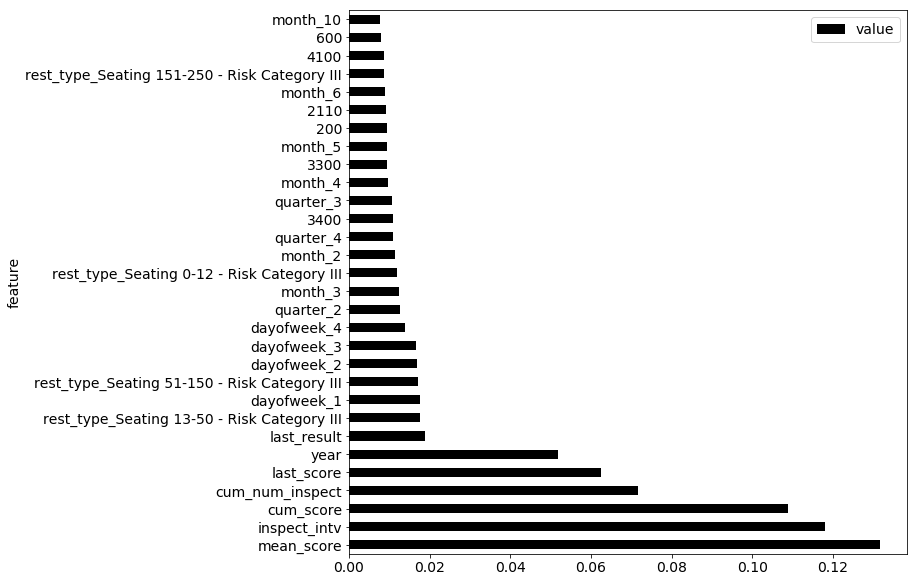

In [97]:
# Check what top 30 features RF found important
rf_clf.fit(X, y)
rf_fi = rf_clf.feature_importances_
rf_fi = pd.DataFrame({'feature': train_inspect.iloc[:,2:].columns, 'value':rf_clf.feature_importances_})
rf_fi.sort_values('value', inplace=True, ascending=False)
rf_fi.iloc[:30,:].plot(x='feature', y='value', kind='barh', figsize=(10,10), color='k')
plt.show()

Not surprisingly, the most significant features are those for past inspection performance. It also appears that the amount of time since last inspection is significant. Finally, I'll check if it looks like more data would be helpful.

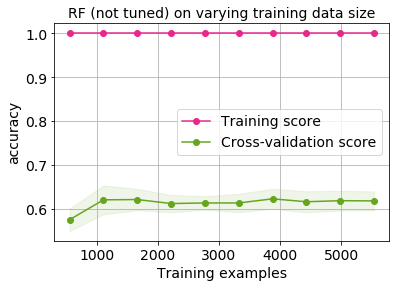

In [98]:
# Plot learning curves
learning_curves(rf_clf, X, y, title='RF (not tuned) on varying training data size')
plt.show()

Despite the variance reduction benefits of a random forest, this model is extremely overfitting. By viewing the learning curves, it does not appear that adding more data would help. 

### Explore Population/Demographic/Neighborhood Features

I will next explore the population/demographic/neighborhood features.

In [99]:
place_features = ['inspect_result', 'tract', 'inspect_score', 'total_pop', 'median_age',
                  '%_male', '%_white', '%_black', '%_asian','%_other_race',
                  '%_hispanic_latino', 'speak_eng_+_other_lang', 'speak_other_lang',
                  '%_married', '%_ed_less_than_hs', '%_ed_grad_prof_deg', 'median_income',
                  '%_poverty', 'long', 'lat']
train_place = train.loc[:,place_features]

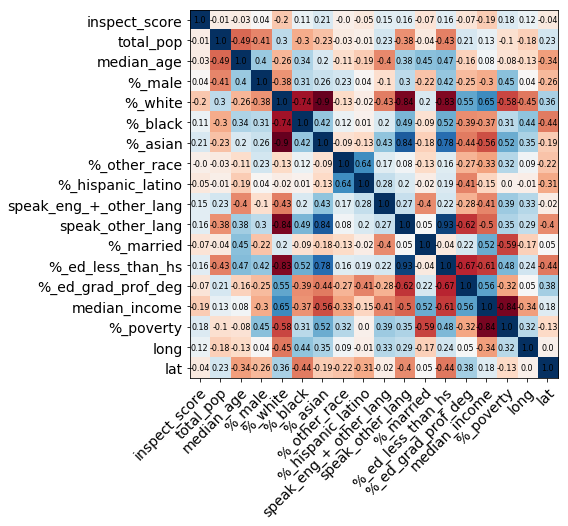

In [100]:
# Evaluate correlations between numeric features
num_columns = train_place.columns[2:]
heat_map(train_place.loc[:,num_columns].corr().values, num_columns, num_columns, sort_f=False,
         figsize=(13,13))

As is typical of population data, there is significant multicollinearity between features (for example, median income and % poverty are strongly inversely correlated).

The largest positive correlations with inspection score (higher is worse) are:
- % asian (+0.19)
- % poverty (+0.17)
- % speaking other language and not speaking english well (+0.14)

Note that those three variables all share significant multicollinearity, so they do not neccessarily provide much independent information. 

The largest negative correlations with inspection score (higher is better) are:
- % white (-0.19)
- % median income (-0.18)

These two variables are also correlated. 

Overall, the correlations between neighborhood demographics and inspection scores is weak.

Note: I am aware that using racial composition of a neighborhood (or other neighborhood factors, which can easily serve as proxies for race) as a predictor in this case is likely inappropriate. However, it may be worth investigating how much these features contribute to a predictive model and discussing as a point of the potential trade-offs between accuracy and discrimination in ML (as well as driving home the point that if there was any past racial bias towards different population segments in food inspections, ML is likely to prioritize those same discriminated groups for future inspections). 

Often data with multicollinearity can be interesting to explore with PCA, which effectively merges linearly reundant components of original features by projecting the dataset onto a new orthogonal basis. 

In [101]:
# Standardize and run PCA on all demographic features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

place_ss = StandardScaler()
train_place_std = place_ss.fit_transform(train_place.loc[:,num_columns[1:]].values)

# Run PCA with all components for now
place_pca = PCA()
train_place_pca = place_pca.fit_transform(train_place_std)

# Make a null set for comparison
uncorr_train_place = np.array(train_place_std)
for i in range(uncorr_train_place.shape[1]):
    np.random.shuffle(uncorr_train_place[:,i])
null_pca = PCA()
null_pca.fit(uncorr_train_place)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

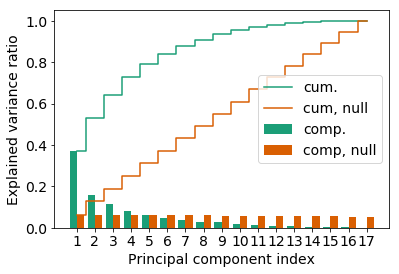

In [102]:
# Plot variance explained vs null ohe set
variance_explained_plot(place_pca, null_pca)

As expected, the first two principal components explain significantly more variance than would be expected with an uncorrelated dataset. I'll visualize the first two principal components and their major components.

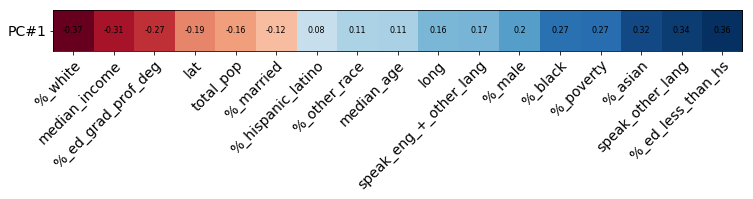

In [103]:
# Plot heatmap of the composition of the first five principal components
heat_map(place_pca.components_[:1], train_place.loc[:,num_columns[1:]].columns,
         ['PC#' + str(i) for i in range(1,len(place_pca.components_[:1])+1)], figsize=(12,5))

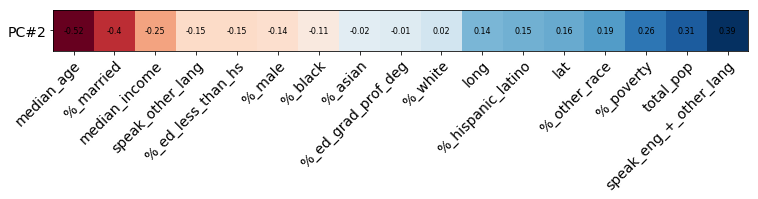

In [104]:
# Plot heatmap of the composition of the second principal component
heat_map(place_pca.components_[1:2], train_place.loc[:,num_columns[1:]].columns,
         ['PC#' + str(i) for i in range(2,len(place_pca.components_[1:2])+2)], figsize=(12,5))

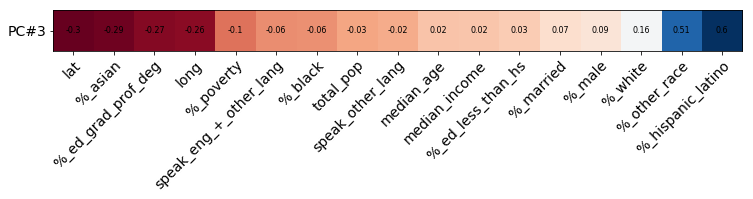

In [105]:
# Plot heatmap of the composition of the second principal component
heat_map(place_pca.components_[2:3], train_place.loc[:,num_columns[1:]].columns,
         ['PC#' + str(i) for i in range(3,len(place_pca.components_[2:3])+3)], figsize=(12,5))

The first principal component appears to be separating affluent white neighborhoods from poor minority neighborhoods with low english speaking rates. The second principal component seems to be separating young, poor, urban neighborhoods from older, affluent, family neighborhoods. Now I'll see if any interesting patterns emerge between these principal components and the inspection results.

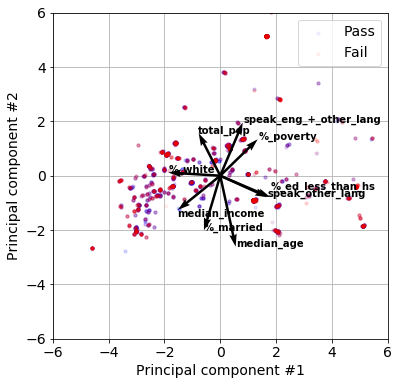

In [106]:
pca_2d_plot(train_place_pca, train_place['inspect_result'].values,
            pca=place_pca, labels=['Pass','Fail'],
            features=train_place.loc[:,num_columns[1:]].columns,
            plot_num_features=9, figsize=(6,6), xlim=(-6,6), ylim=(-6,6))

There isn't much of a clear pattern between the principal components and 'pass inspection' (blue) and 'fail inspection' (red). However, it's important to remember that the first two principal components maximize variance explained in the features themselves, not neccessarily association with the response. Therefore, I'll check correlations between all of the principal components and inspection scores.

In [107]:
# Now review correlations between the principal components and the result score
place_pca_df = pd.DataFrame(train_place_pca,
                            columns=[f'PC: {str(i)}' for i in range(train_place_pca.shape[1])])
place_pca_df['inspect_score'] = train_place['inspect_score']
place_pca_df['inspect_result'] = train_place['inspect_result']
num_columns = place_pca_df.iloc[:,:-1].columns
[(feature, cor) for feature, cor in zip(place_pca_df.loc[:,num_columns].columns[:-1],
                                         place_pca_df.loc[:,num_columns].corr().values[-1])]

[('PC: 0', -0.013695734810681825),
 ('PC: 1', -0.01361565128347099),
 ('PC: 2', -0.025272613357518698),
 ('PC: 3', -0.008330367150785065),
 ('PC: 4', 0.03111178490897561),
 ('PC: 5', 0.00825399138001499),
 ('PC: 6', -0.0035093287651836737),
 ('PC: 7', 0.012702194246295503),
 ('PC: 8', 0.007515602105239267),
 ('PC: 9', -0.012919351875537373),
 ('PC: 10', 0.003428609427250646),
 ('PC: 11', 0.02662256368743973),
 ('PC: 12', -0.006358893772060044),
 ('PC: 13', 0.003240448052855142),
 ('PC: 14', 0.03198169046273368),
 ('PC: 15', 0.0005306832914929958),
 ('PC: 16', 0.014840583379155392)]

After transformation to principal components, there is essentially no correlation between the features and the result score.

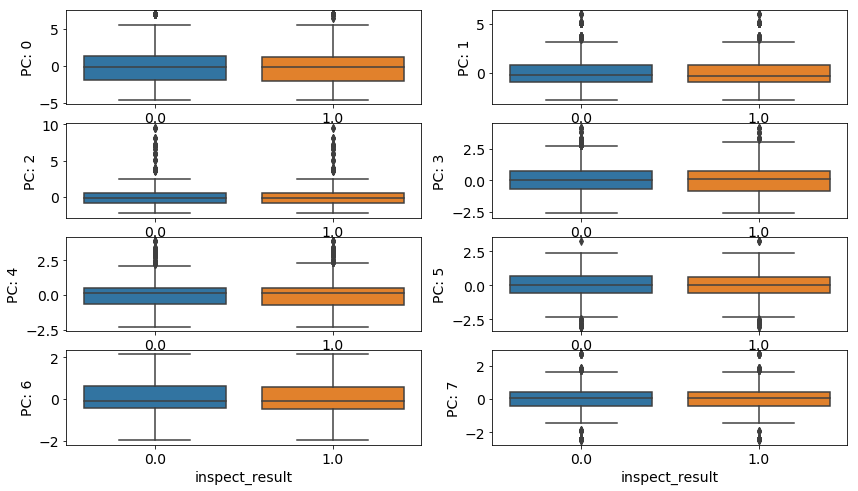

In [108]:
# Explore proportion of failed inspections vs. principal components
fig, axes = plt.subplots(4,2,figsize=(14,8))
for idx, var in enumerate(place_pca_df.columns[:8]):
    sns.boxplot(x='inspect_result', y=var, data=place_pca_df, ax=axes[idx // 2,idx % 2])

Similar to comparison with the scores, there is no evidence of a relationship between the principal components and the binary inspection outcome. Finally, I will check inspection outcomes vs. the original features with greatest correlations to inspection scores. 

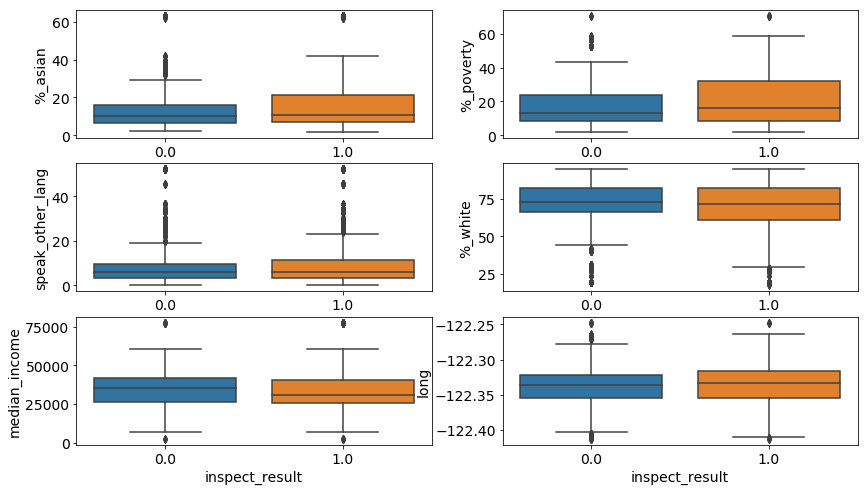

In [109]:
# Explore proportion of failed inspections vs. original neighborhood features
fig, axes = plt.subplots(3,2,figsize=(14,8))
for idx, var in enumerate(['%_asian', '%_poverty', 'speak_other_lang', '%_white', 'median_income',
                           'long']):
    sns.boxplot(x='inspect_result', y=var, data=train_place, ax=axes[idx // 2,idx % 2])

Overall, the results seem to indicate that on average there is no interaction between neighborhood features and inspection results. However, there is a longer right tail for %_asian and %_poverty, which might indicate that creating a categorical feature for very high values of these features could be predictive. It's also possible that I'm looking too hard for features so use of the est set will be important if I try to include these. One way to test whether significant non-linear relationships (like an association only with tail values of a feature) is with a random forest which makes no assumption of linearity. 

I will try a random forest on only the neighborhood features and see how it compares to a dummy (majority class always) model in cross-validation. 

In [110]:
# Fit random forest and dummy classifier on only the place features
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

X = train_place.iloc[:,3:].values
X_pca = train_place_pca 
y = train_place.loc[:,'inspect_result'].values

dum_clf = DummyClassifier(strategy='most_frequent')
rf_clf = RandomForestClassifier(n_estimators=500)

dum_score = cross_val_score(dum_clf,X, y, scoring='accuracy', cv=10)
rf_score = cross_val_score(rf_clf,X, y, scoring='accuracy', cv=10)
pca_rf_score = cross_val_score(rf_clf,X_pca, y, scoring='accuracy', cv=10)

print(f'Dummy classifier cross-validation accuracy: mean = {dum_score.mean()}, stdev = {dum_score.std()}')
print(f'RF classifier cross-validation accuracy: mean = {rf_score.mean()}, stdev = {rf_score.std()}')
print(f'RF PCA classifier cross-validation accuracy: mean = {pca_rf_score.mean()}, stdev = {pca_rf_score.std()}')

Dummy classifier cross-validation accuracy: mean = 0.518109756097561, stdev = 0.00038587309858800414
RF classifier cross-validation accuracy: mean = 0.6384573962622743, stdev = 0.012729287661328716
RF PCA classifier cross-validation accuracy: mean = 0.6386215816703622, stdev = 0.01148292203660719


There does appear to be a modest gain from the inclusion of neighborhood features. This illustrates that typical approaches for linear model EDA like correlation coefficients and side-by-side boxplots don't always reveal the story for non-linear models. It will be interesting to see whether these features still add accuracy to a model with all other features or if the information is redundant. As expected, PCA does not help a random forest model. 

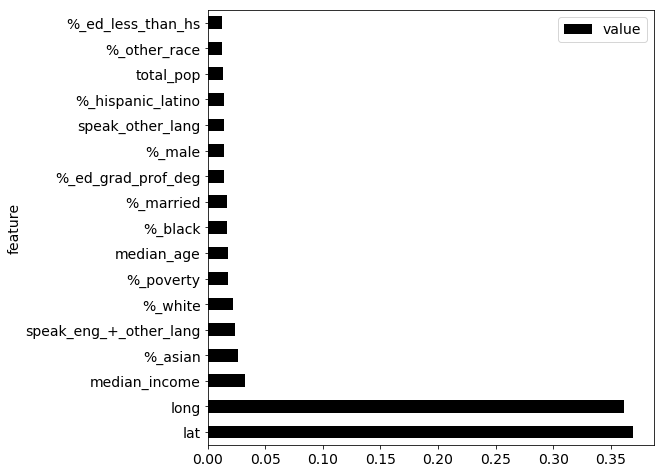

In [111]:
# Check what features RF found important
rf_clf.fit(X, y)
rf_fi = rf_clf.feature_importances_
rf_fi = pd.DataFrame({'feature': train_place.iloc[:,3:].columns, 'value':rf_clf.feature_importances_})
rf_fi.sort_values('value', inplace=True, ascending=False)
rf_fi.plot(x='feature', y='value', kind='barh', figsize=(8,8), color='k')

Interesting, latitude and longitude are dominating in importance. Again, this shows that a random forest picks out different relationships than typical linear measures like the correlation coefficients shown in the heat map above. I'll plot the results over a map of Seattle and see what it reveals. 

In [113]:
# Citation: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
import geopandas as gpd

# Load in all tracts in Washington State
fp = "2010_WA_geo_files/gz_2010_53_140_00_500k.shp"
map_df = gpd.read_file(fp)

In [114]:
# Get range of lat-lon of interest
max_lat = train_place['lat'].max()
min_lat = train_place['lat'].min()
max_lon = train_place['long'].max()
min_lon = train_place['long'].min()
map_df = map_df.cx[min_lon-.1:max_lon+.1,min_lat-.1:max_lat+.1]

In [115]:
# Aggregate inspection scores and results by census tract
train_place['tract'] = train_place['tract'].astype(str).str.zfill(6)
agg_feats = ['tract', 'inspect_score', 'inspect_result', 'speak_eng_+_other_lang',
             'lat', 'long', '%_white', '%_asian', 'median_income']
train_place_agg = train_place.loc[:,agg_feats].groupby('tract', as_index=False).mean()
train_place_agg['median_income'] = train_place_agg['median_income'] / train_place_agg['median_income'].max()
merged = map_df.set_index('TRACT').join(train_place_agg.set_index('tract'))
merged.dropna(inplace=True)

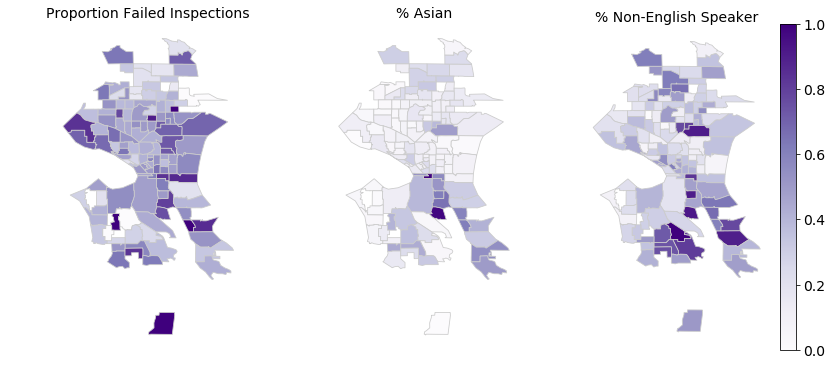

In [116]:
# Create choropleth of proportion inspection failures
fig, axes = plt.subplots(1,3,figsize=(14, 6))
for ax, var, title in zip(axes, ['inspect_result', '%_asian', 'speak_eng_+_other_lang'],
                                ['Proportion Failed Inspections', '% Asian', '% Non-English Speaker']):
    merged.plot(column=var, cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '14'})

# Create colorbar as a legend
leg = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=0, vmax=1))
leg._A = []
cbar = fig.colorbar(leg)

It appears that roughly the north and southwest have lower failure rates. While, it will not match a random forest, I can see what divisions a shallow decision tree regressor learns. The 

In [117]:
# I will run a grid search over shallow decision trees and let cross-validation
# on MSE select the regions. I will use LOOCV due to the small number of samples,
# although it's not the optimal CV approach in general due to high variance.
# However, I'm simply trying to find a decent summary of the variance with latitude and longitude.
# Note that this is no the same as what the random forest learns from lat-lon,
# but it can give the "gist" of major splits.

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor
params = {'max_depth': [1,2,3,4], 'min_samples_leaf': [1,5,10]}
dt_gs = GridSearchCV(DecisionTreeRegressor(), params, cv=merged.shape[0], scoring='neg_mean_squared_error')
dt_gs.fit(merged.loc[:,['lat','long']].values, merged['inspect_result'].values)
print(f'Best params: {dt_gs.best_params_}, Best score (DT): {dt_gs.best_score_}')
dummy_score = np.mean(cross_val_score(DummyRegressor(), merged.loc[:,['lat','long']].values,
                                      merged['inspect_result'].values, cv=merged.shape[0], scoring='neg_mean_squared_error'))
print(f'Best score (dummy): {dummy_score}')

Best params: {'max_depth': 2, 'min_samples_leaf': 10}, Best score (DT): -0.03767244535057231
Best score (dummy): -0.04245003446332597


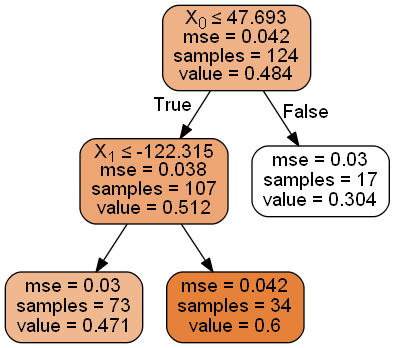

In [118]:
# Citation for plotting code below: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dt_reg = dt_gs.best_estimator_
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

$X_0$ is latitude and $X_1$ is longitude. The decision tree is splitting first
on high-northern latitudes and then splits the southern region East and West. It looks like the lat-long of the highest purple tract is off, so I will need to fix that eventually. 

In [119]:
merged['predict'] = dt_reg.predict(merged.loc[:,['lat','long']].values)

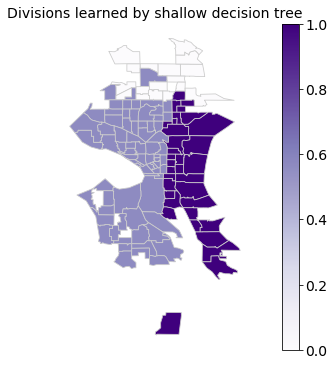

In [120]:
# Create choropleth showing how lat-long splits Seattle
fig, ax = plt.subplots(1, figsize=(12, 6))
merged.plot(column='predict', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Divisions learned by shallow decision tree', fontdict={'fontsize': '14'})

# Create colorbar as a legend
leg = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=0, vmax=1))
leg._A = []
cbar = fig.colorbar(leg)

I'm also curious how much the random forest is overfitting and whether more 
inspection samples might help. The plot below shows that the model might keep benefitting from more data, but overall looks pretty good. 

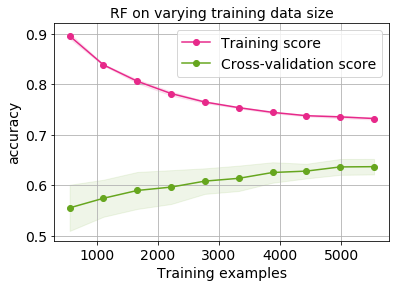

In [121]:
# Plot learning curves
learning_curves(rf_clf, X, y, title='RF on varying training data size')

Sometimes using geospatial location of neighborhoods is criticized as being a proxy for disallowed disciminatory variables such as race. I will see how much cross-validation accuracy is lost by dropping latitude and longitude and if other variables increase in importance.

In [122]:
# Fit random forest and dummy classifier on the non lat-lon features
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

X = train_place.drop(['lat','long'], axis=1).iloc[:,3:].values
y = train_place.loc[:,'inspect_result'].values

dum_clf = DummyClassifier(strategy='most_frequent')
rf_clf = RandomForestClassifier(n_estimators=500)

dum_score = cross_val_score(dum_clf,X, y, scoring='accuracy', cv=10)
rf_score = cross_val_score(rf_clf,X, y, scoring='accuracy', cv=10)

print(f'Dummy classifier cross-validation accuracy: mean = {dum_score.mean()}, stdev = {dum_score.std()}')
print(f'RF classifier cross-validation accuracy: mean = {rf_score.mean()}, stdev = {rf_score.std()}')


Dummy classifier cross-validation accuracy: mean = 0.518109756097561, stdev = 0.00038587309858800414
RF classifier cross-validation accuracy: mean = 0.5734888079400273, stdev = 0.02170617361933016


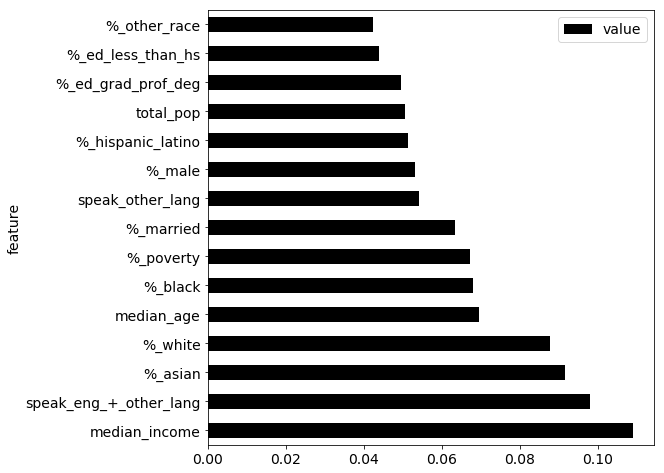

In [123]:
# Check what features RF found important
rf_clf.fit(train_place.drop(['lat','long'], axis=1).iloc[:,3:].values, y)
rf_fi = rf_clf.feature_importances_
rf_fi = pd.DataFrame({'feature': train_place.drop(['lat','long'], axis=1).iloc[:,3:].columns, 'value':rf_clf.feature_importances_})
rf_fi.sort_values('value', inplace=True, ascending=False)
rf_fi.plot(x='feature', y='value', kind='barh', figsize=(8,8), color='k')

It looks like the concern may be at least partially valid, about half the gain over a dummy classifier remains when latitude and longitude are removed and race is now more significant. In practice, it could be important to do something like regress all of the racial features on the final feature set and see if they are too closely associated to be just and ethical. Fortunately, race alone is not a particularly strong predictor. 

Race only

In [124]:
# Fit random forest and dummy classifier on only the place features
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

X = train_place.drop(['total_pop', 'median_age', '%_male', 
                      '%_married', '%_ed_less_than_hs', '%_ed_grad_prof_deg', 'median_income',
                      '%_poverty', 'long', 'lat'], axis=1).iloc[:,3:].values
y = train_place.loc[:,'inspect_result'].values

dum_clf = DummyClassifier(strategy='most_frequent')
rf_clf = RandomForestClassifier(n_estimators=500)

dum_score = cross_val_score(dum_clf,X, y, scoring='accuracy', cv=10)
rf_score = cross_val_score(rf_clf,X, y, scoring='accuracy', cv=10)

print(f'Dummy classifier cross-validation accuracy: mean = {dum_score.mean()}, stdev = {dum_score.std()}')
print(f'RF classifier cross-validation accuracy: mean = {rf_score.mean()}, stdev = {rf_score.std()}')

Dummy classifier cross-validation accuracy: mean = 0.518109756097561, stdev = 0.00038587309858800414
RF classifier cross-validation accuracy: mean = 0.5785220673635307, stdev = 0.01924484320281805


Non-race only

In [125]:
# Fit random forest and dummy classifier on only the place features
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

X = train_place.drop(['%_white', '%_black', '%_asian','%_other_race',
                      '%_hispanic_latino', 'speak_eng_+_other_lang',
                      'speak_other_lang'], axis=1).iloc[:,3:].values
y = train_place.loc[:,'inspect_result'].values

dum_clf = DummyClassifier(strategy='most_frequent')
rf_clf = RandomForestClassifier(n_estimators=500)

dum_score = cross_val_score(dum_clf,X, y, scoring='accuracy', cv=10)
rf_score = cross_val_score(rf_clf,X, y, scoring='accuracy', cv=10)

print(f'Dummy classifier cross-validation accuracy: mean = {dum_score.mean()}, stdev = {dum_score.std()}')
print(f'RF classifier cross-validation accuracy: mean = {rf_score.mean()}, stdev = {rf_score.std()}')

Dummy classifier cross-validation accuracy: mean = 0.518109756097561, stdev = 0.00038587309858800414
RF classifier cross-validation accuracy: mean = 0.6421932742054695, stdev = 0.01263534102063878


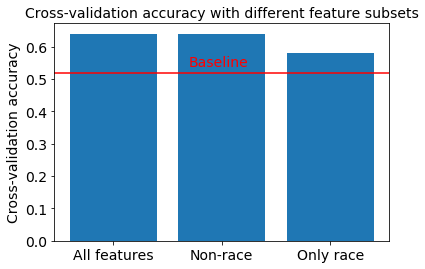

In [126]:
plt.bar([0,1,2], [0.64, 0.64, 0.58], width=0.8, bottom=None, align='center',
        tick_label=['All features', 'Non-race', 'Only race'], data=None)
plt.title('Cross-validation accuracy with different feature subsets')
plt.ylabel('Cross-validation accuracy')
plt.axhline(0.52, color='red')
plt.text(0.7, 0.54, 'Baseline', color='red')
plt.show()

Overall, latitude and longtitude are the most predictive, but using racial features alone does lift the predictions some above a baseline model. I will have to come back to this discussion when I am working on the final model and see if the features being used are acceptable. 

### Explore Yelp! Features

In [127]:
# Get subset of data related to Yelp!
yelp_features = ['restaurant_id', 'inspect_result', 'inspect_score', 'avg_norm_rating', 'avg_rating',
                 'num_reviews_intv', 'categories', 'all_reviews', 'neg_reviews', 'pos_reviews',
                 'unsat_reviews', 'sat_reviews']
train_yelp = train.loc[:,yelp_features]
train_yelp_text = train_yelp.loc[:, ['all_reviews', 'neg_reviews', 'pos_reviews',
                 'unsat_reviews', 'sat_reviews']]
train_yelp.reset_index(drop=True, inplace=True)

First, I will see if I can find structure in the categories feature. The categories feature is a multi-label feature based on the tags assigned on Yelp!. Here are a few examples:

In [128]:
# Count number of unique cusine categories
unique_categories = set()
for i in range(train_yelp.shape[0]):
    unique_categories = unique_categories.union(set(train_yelp.loc[i,'categories']))
print(f'Number of unique cusine categories: {len(unique_categories)}')

Number of unique cusine categories: 135


In [129]:
# Get count for each category, correcting for restaurants with more inspections by de-duplicating
temp_data = train_yelp.loc[:,['restaurant_id','categories']].drop_duplicates(subset='restaurant_id').reset_index(drop=True)
count_categories = {}
for i in range(temp_data.shape[0]):
    for cat in temp_data.loc[i, 'categories']:
        try:
            count_categories[cat] += 1
        except KeyError:
            count_categories[cat] = 1
            
for cat, count in sorted(count_categories.items(), key= lambda x : x[1], reverse=True):
    print(f'Category: {cat}, Count: {count}, {100*count/temp_data.shape[0]}%')

Category: Restaurants, Count: 948, 100.0%
Category: Nightlife, Count: 152, 16.033755274261605%
Category: Bars, Count: 142, 14.978902953586498%
Category: Food, Count: 117, 12.341772151898734%
Category: Sandwiches, Count: 109, 11.49789029535865%
Category: Fast Food, Count: 88, 9.282700421940929%
Category: American (Traditional), Count: 86, 9.071729957805907%
Category: Pizza, Count: 82, 8.649789029535865%
Category: Chinese, Count: 78, 8.227848101265822%
Category: American (New), Count: 65, 6.856540084388186%
Category: Mexican, Count: 65, 6.856540084388186%
Category: Breakfast & Brunch, Count: 63, 6.6455696202531644%
Category: Japanese, Count: 61, 6.434599156118144%
Category: Italian, Count: 56, 5.9071729957805905%
Category: Burgers, Count: 55, 5.801687763713081%
Category: Delis, Count: 51, 5.379746835443038%
Category: Seafood, Count: 48, 5.063291139240507%
Category: Thai, Count: 46, 4.852320675105485%
Category: Pubs, Count: 45, 4.746835443037975%
Category: Vietnamese, Count: 45, 4.7468354

Anything with a low count is unlikely to generalize well. However, it's possible that certain cusine types are particularly risky for food safety violations. 

In [130]:
# Explore distribution of labels through OHE

# First remove Restaurants, as it occurs in every instance as well as any others that appear 10 times or less
unique_categories.remove('Restaurants')
for cat, count in sorted(count_categories.items(), key= lambda x : x[1], reverse=False):
    if count <= 10:
        unique_categories.remove(cat)
    elif count > 10:
        break

def check_membership(x, element):
    '''Helper for checking membership of element in a list'''
    return element in x

column_labels = []
cuisine_ohe = np.zeros((temp_data.shape[0], len(unique_categories)))

for i, cat in enumerate(unique_categories):
    column_labels.append(cat)
    cuisine_ohe[:,i] = temp_data['categories'].apply(check_membership, element=cat).values

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cuisine_ss = StandardScaler()
cuisine_ohe_std = cuisine_ss.fit_transform(cuisine_ohe)

cuisine_pca = PCA(n_components=25)
pca_cuisine_ohe = cuisine_pca.fit_transform(cuisine_ohe_std)

# Make a null set for comparison
uncorr_ohe = np.array(cuisine_ohe_std)
for i in range(uncorr_ohe.shape[1]):
    np.random.shuffle(uncorr_ohe[:,i])
null_pca = PCA(n_components=25)
null_pca.fit(uncorr_ohe)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

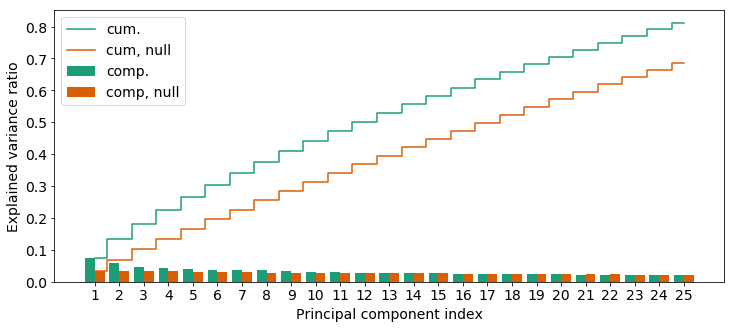

In [132]:
# Plot variance explained vs null ohe set
variance_explained_plot(cuisine_pca, null_pca, figsize=(12,5))

This compression is pretty mediocre. I may need to revisit PCA after checking if any labels occur often enough and also have a significant correlation with the response variable.

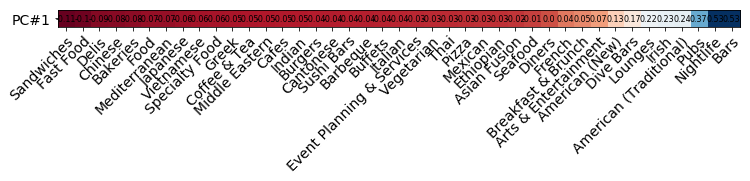

In [133]:
# Plot heatmap of the composition of the first principal component
heat_map(cuisine_pca.components_[:1], column_labels,
         ['PC#' + str(i) for i in range(1,len(cuisine_pca.components_[:1])+1)], figsize=(12,5))

Only the first principal component showed significant (above null set expectation) multicollinearity and upon investigation showed that the labels Bars, Nightlife, Pubs, etc. all tend to occur together which makes sense.

Next, I will try clustering the cuisine types using a simple k-means approach.

In [134]:
from sklearn.cluster import KMeans
from GapAnalysis import *

max_clusters=25

# Evaluate varying numbers of clusters using within-cluster SSE
km_inertias = []
km_labels = []
km_centers = []
range_n_clusters = [n for n in range(1,max_clusters+1)]
for n in range_n_clusters:
    km = KMeans(n_clusters=n)
    labels = km.fit_predict(cuisine_ohe)
    km_labels.append(labels)
    km_inertias.append(km.inertia_)
    km_centers.append(km.cluster_centers_)

In [135]:
# Run gap analysis for comparison of clusters to null samples
ga = GapAnalysis(KMeans, random_state=0, max_clusters=max_clusters, num_samples=10)
ga.fit(cuisine_ohe)

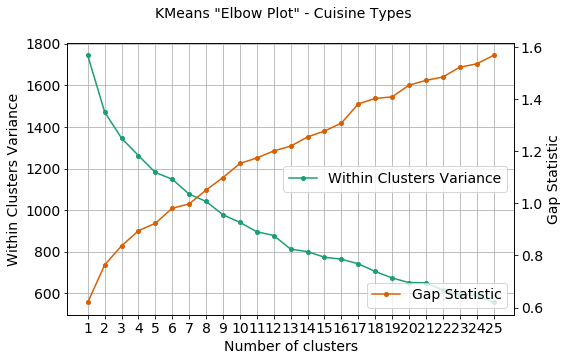

In [136]:
km_elbow_diagram(range_n_clusters, [km_inertias, ga.gap_], 
                 metrics=['Within Clusters Variance', 'Gap Statistic'],
                 title='KMeans "Elbow Plot" - Cuisine Types',
                 leg_loc1='center right', leg_loc2='lower right', figsize=(8,5))

As is typical, k-means has somewhat subjective results. It looks like around 9 clusters is a good place to investigate.

In [137]:
# Make df with km_centers for 9 clusters
km_centers_df = pd.DataFrame(km_centers[8], columns=column_labels)

In [138]:
# Let's look at the three largest contributors to each cluster. A more sophisticated approach
# would be to report the main contributors up until a steep drop (maybe look at that later).
label_comps = []
for i in range(km_centers_df.shape[0]):
    temp = km_centers_df.iloc[i,:].sort_values(ascending=False)
    label_comps.append(temp.index.tolist()[:3])
    print(f'Label: {i}, {label_comps[i]}')

Label: 0, ['Food', 'Bakeries', 'Coffee & Tea']
Label: 1, ['Mexican', 'Thai', 'American (Traditional)']
Label: 2, ['Nightlife', 'Bars', 'Pubs']
Label: 3, ['Delis', 'Sandwiches', 'Food']
Label: 4, ['Fast Food', 'Burgers', 'Sandwiches']
Label: 5, ['Japanese', 'Sushi Bars', 'Asian Fusion']
Label: 6, ['Nightlife', 'American (Traditional)', 'Bars']
Label: 7, ['Pizza', 'Italian', 'Sandwiches']
Label: 8, ['Chinese', 'Cantonese', 'Fast Food']


These clusters appear to mostly make sense as common types of restaurants. Intuitively, this should be more meaningful than looking at individual labels, given that the cuisine feature is multi-label. 

It will be interesting to see if any of these categories are correlated with the inspection results.

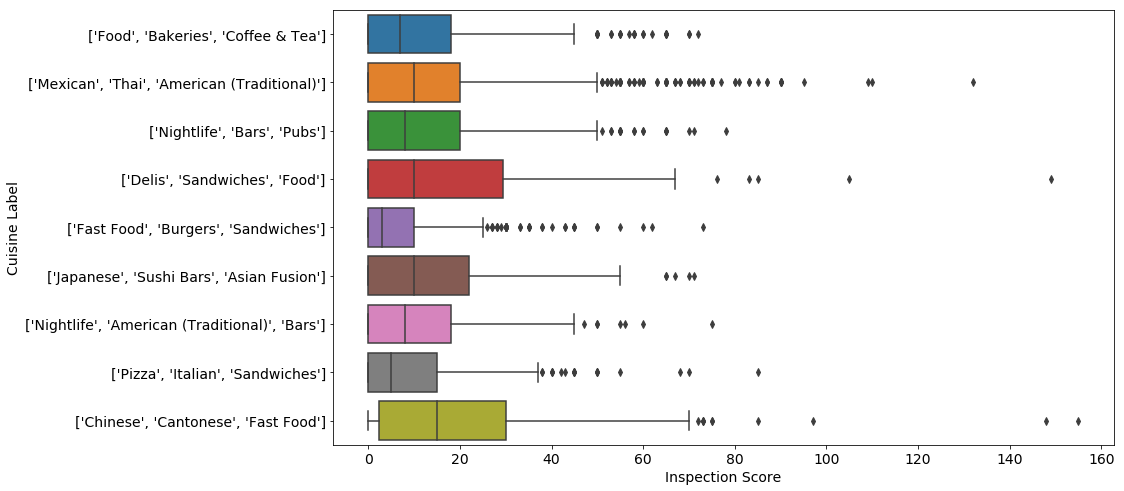

In [140]:
temp_data['cuisine_labels'] = km_labels[8]
train_yelp = train_yelp.merge(temp_data, how='left', on='restaurant_id').drop(['categories_x', 'categories_y'], axis=1)
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(y="cuisine_labels", x="inspect_score", data=train_yelp, ax=ax, orient='h'
           ).set(xlabel='Inspection Score', ylabel='Cuisine Label', yticklabels=label_comps)
plt.show()

I don't think one-way ANOVA would work well here, given the large number of outlier. I will try some transforms.

In [141]:
train_yelp['log_inspect_score'] = train_yelp['inspect_score'].apply(lambda x: np.power(1+x,0.4))

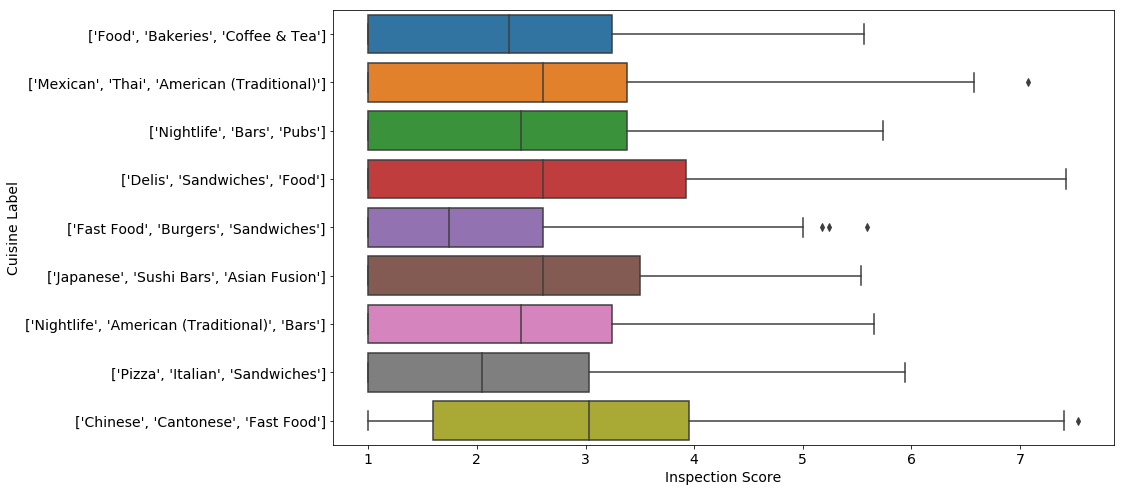

In [142]:
#temp_data['cuisine_labels'] = km_labels[8]
#train_yelp = train_yelp.merge(temp_data, how='left', on='restaurant_id').drop(['categories_x', 'categories_y'], axis=1)
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(y="cuisine_labels", x="log_inspect_score", data=train_yelp, ax=ax, orient='h'
           ).set(xlabel='Inspection Score', ylabel='Cuisine Label', yticklabels=label_comps)
plt.show()

This looks a little better, but most categories are still rather skewed. I don't think I can meet the assumptions for one-way ANOVA, but I can try a random forest and see what lift is acheived. 

In [143]:
# Fit random forest and dummy classifier on only the cuisine labels 
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

X = pd.get_dummies(train_yelp.loc[:,'cuisine_labels'], columns=['cuisine_labels']).values 
y = train_yelp.loc[:,'inspect_result'].values

dum_clf = DummyClassifier(strategy='most_frequent')
rf_clf = RandomForestClassifier(n_estimators=500)

dum_score = cross_val_score(dum_clf,X, y, scoring='accuracy', cv=10)
rf_score = cross_val_score(rf_clf,X, y, scoring='accuracy', cv=10)

print(f'Dummy classifier cross-validation accuracy: mean = {dum_score.mean()}, stdev = {dum_score.std()}')
print(f'RF classifier cross-validation accuracy: mean = {rf_score.mean()}, stdev = {rf_score.std()}')

Dummy classifier cross-validation accuracy: mean = 0.518109756097561, stdev = 0.00038587309858800414
RF classifier cross-validation accuracy: mean = 0.5254228698131137, stdev = 0.01742024747322205


While the categories are interesting, they appear to be negligable in terms of predicting food safety violations.

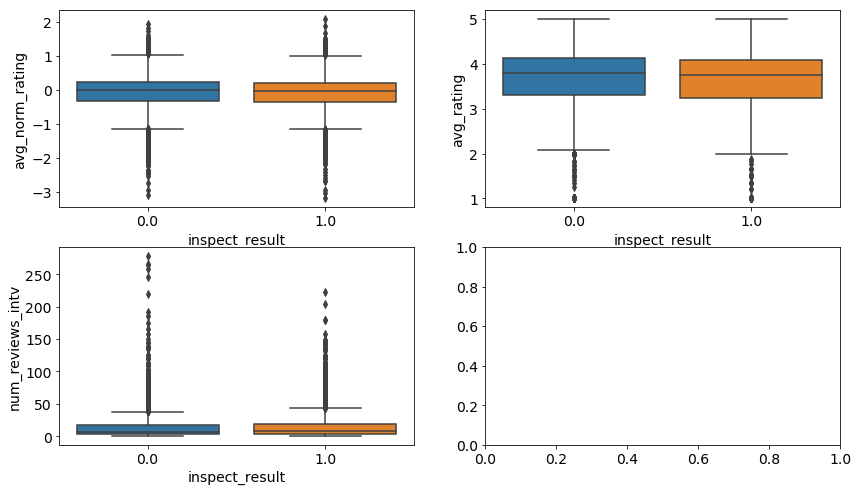

In [144]:
# Explore proportion of failed inspections vs. other Yelp! features
fig, axes = plt.subplots(2,2,figsize=(14,8))
for idx, var in enumerate(['avg_norm_rating', 'avg_rating', 'num_reviews_intv']):
    sns.boxplot(x='inspect_result', y=var, data=train_yelp, ax=axes[idx // 2,idx % 2])

Nothing looks significant here, either. I'll move on to the text itself. I will start with all reviews and logistic regression with a straightforward bag of words approach. 

In [145]:
# Use basic text cleaning function from reference book
# Citation: Python Machine Learning 2nd Edition, Raschka
def preprocessor(text):
    try:
        text = re.sub('<[^>]*>', '', text)
        emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                               text)
        text = (re.sub('[\W]+', ' ', text.lower()) +
                ' '.join(emoticons).replace('-', ''))
        return text
    except TypeError:
        return np.NaN

In [146]:
# Preprocess all reviews
for col in train_yelp_text.columns:
    train_yelp_text[col] = train_yelp_text[col].apply(preprocessor)

In [147]:
# Initialize various tokenizer functions
sno = nltk.stem.SnowballStemmer('english')
lem = nltk.wordnet.WordNetLemmatizer()

def tokenize(text):
    return text.split()

def snowball(text):
    return [sno.stem(token) for token in text.split()]

def lemmatize(text):
    return [lem.lemmatize(token) for token in text.split()]

In [148]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [149]:
# Citation: Python Machine Learning 2nd Edition, Raschka

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1), (1, 2)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenize, snowball, lemmatize],
               'clf__penalty': ['l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1), (1, 2)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenize, snowball, lemmatize],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=1,
                           n_jobs=4)

In [ ]:
gs_lr_tfidf.fit(train_yelp_text.loc[:,'all_reviews'].values, train_yelp.loc[:,'inspect_result'].values)

In [ ]:
best_params = gs_lr_tfidf.best_params_
best_score = gs_lr_tfidf.best_score_
print(f'Best params: {best_params}, Best score: {best_score})

To be continued. This analysis is a work in progress. See README.md for status and next steps.